# West Nile Virus Predicition
## <u>Exploratory Data Analysis</u>


## 1. Introduction 

## 2. Table of Contents  <a id='Table of Contents'></a>

- <a href='#Introduction'>1. Introduction</a>


- <a href='#Table of Contents'>2. Table of Contents</a>


- <a href='#Data Imports'>3. Library Imports</a>


- <a href='#Spray'>4. Visualizing Sprayed Areas</a>   


- <a href='#Mosq Dist'>5. Analysis of Number Mosquitos</a>
    - <a href='#N Count'>5.1 Count of Unique Traps</a>    
    - <a href='#TVT Traps'>5.2 Comparison of Train vs Test Traps</a>
    - <a href='#num mos lat long'>5.3 Number of Mosquitos by Latitude and Longitude</a>
    - <a href='#num mos lat long year'>5.4 Number of Mosquitos by Latitude, Longitude, and Year</a>             
    
  
- <a href='#WNV anal'>6. Analysis of West Nile Virus</a>    
    - <a href='#species'>6.1 Presence of Virus Based on Species</a>  
    - <a href='#virus year'>6.2 Presence of Virus based on Year</a>  
    - <a href='#virus month'>6.3 Presence of Virus based on Month</a>  
    - <a href='#wnv lat long'>6.4 Presence of Virus based on Latitude and Longitude</a>  
    - <a href='#wnv lat long year'>6.5 Presence of Virus based on Latitude, Longitude and Year</a>  
    - <a href='#Dummy Var'>5.6 Dummying Variables</a>      
    
    
- <a href='#corr'>7. Correlation Analysis</a>


- <a href='#dist'>8. Distribution Analysis</a>


- <a href='#clusters'>9. Investigating Clusters</a>
    - <a href='#clean weather 2'>9.1 DBScan Clusters</a>   
    - <a href='#clean train 2'>9.2 KMeans Clusters</a>   
    - <a href='#clean spray 2'>9.3 Meanshift Clusters</a>   

## 3. Library Imports  <a id='Data Imports'></a>

In [2]:
#General Imports
import pandas as pd
import numpy as np
import time
import random
import math
from collections import namedtuple, Counter
import scipy.stats as stats
from scipy.stats import norm
import datetime
from haversine import haversine, Unit
from math import radians, sin, cos, asin, sqrt

#Plotting/Graphs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits import mplot3d
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

%matplotlib inline

#Modelling Imports
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import stop_words
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

#Lets you view all columns in a dataframe when there are a LARGE number of columns
pd.set_option('display.max_columns', None)
#Fix for pandas truncating long strings (e.g. urls)
#If you don't run this, pandas will cut short your long urls and this breaks code that require urls
pd.set_option("display.max_colwidth", 10000)



In [3]:
#Fun stuff
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import *

## 4. Visualizing Spray Area <a id='Spray'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [17]:
model1_train = pd.read_csv('./datasets/clean_train_1.csv')
model1_kag = pd.read_csv('./datasets/clean_test_1.csv')

model2_train = pd.read_csv('./datasets/clean_train.csv')
model2_kag = pd.read_csv('./datasets/clean_test.csv')

train_df = pd.read_csv('./datasets/train.csv')

spray = pd.read_csv('./datasets/spray.csv')

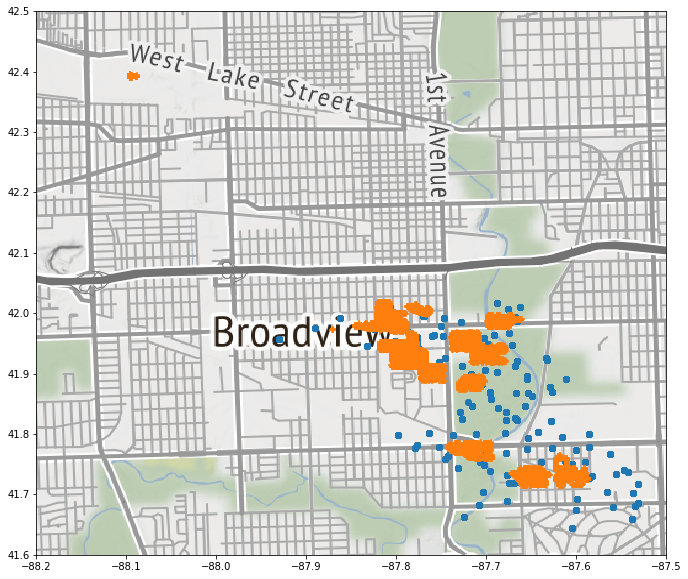

In [13]:
#mapdata = np.loadtxt("./input/mapdata_copyright_openstreetmap_contributors.txt")
mapdata = np.loadtxt("./datasets/mapdata_copyright_openstreetmap_contributors.txt")
#traps = pd.read_csv('../input/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]



import matplotlib.image as mpimg
img=mpimg.imread('./image/Chicago.png')

aspect = mapdata.shape[0] * .5 / mapdata.shape[1]
lon_lat_box = (-88.2, -87.5, 41.6, 42.5)
#imgplot = plt.imshow(img)

plt.figure(figsize=(20,10))
# plt.imshow(mapdata, 
#            cmap=plt.get_cmap('gray'), 
#            extent=lon_lat_box, 
#            aspect=aspect
#           )

plt.imshow(img, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect
          )

locations = model1_train[['Longitude', 'Latitude']].values
spray = spray[['Longitude', 'Latitude']].values
plt.scatter(locations[:,0], locations[:,1], marker='o')
plt.scatter(spray[:,0], spray[:,1], marker='+')

## 5. Analysis of Number of Mosquitos<a id='Mosq Dist'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

###  5.1 Count of Unique Traps   <a id='N Count'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

Text(0.5, 1.0, 'Count of Unique Traps')

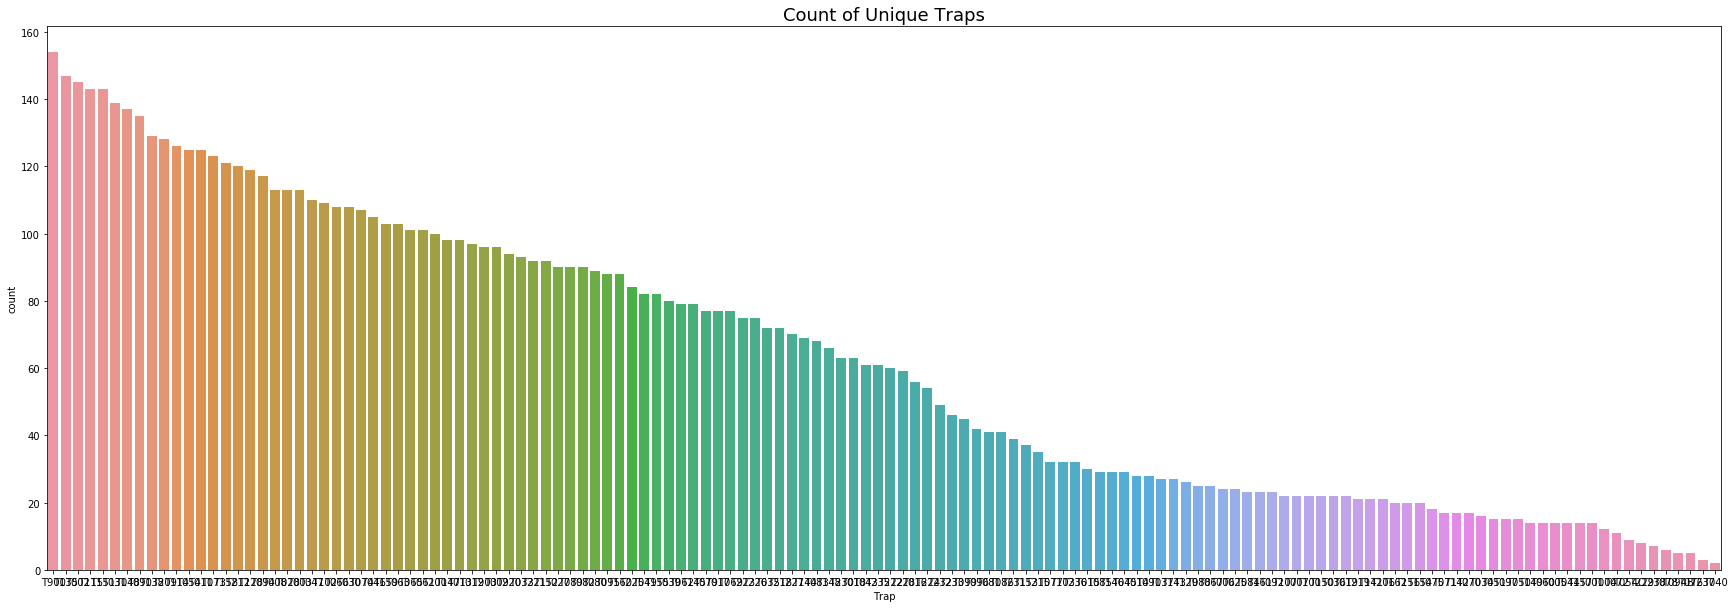

In [35]:
plt.figure(figsize = (30, 10))
sns.countplot(x = 'Trap', data = model1_train, order = model1_train['Trap'].value_counts().index)
plt.title('Count of Unique Traps', fontsize = 18)

The plot above captures the number of times each trap ID (i.e. each unique trap) was set up. Lower counts indicate that there are traps that were not active throughout the four years in the train data set.

### 5.2 Traps in Train vs Test Set  <a id='TVT Traps'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

Text(0, 0.5, 'Longitude')

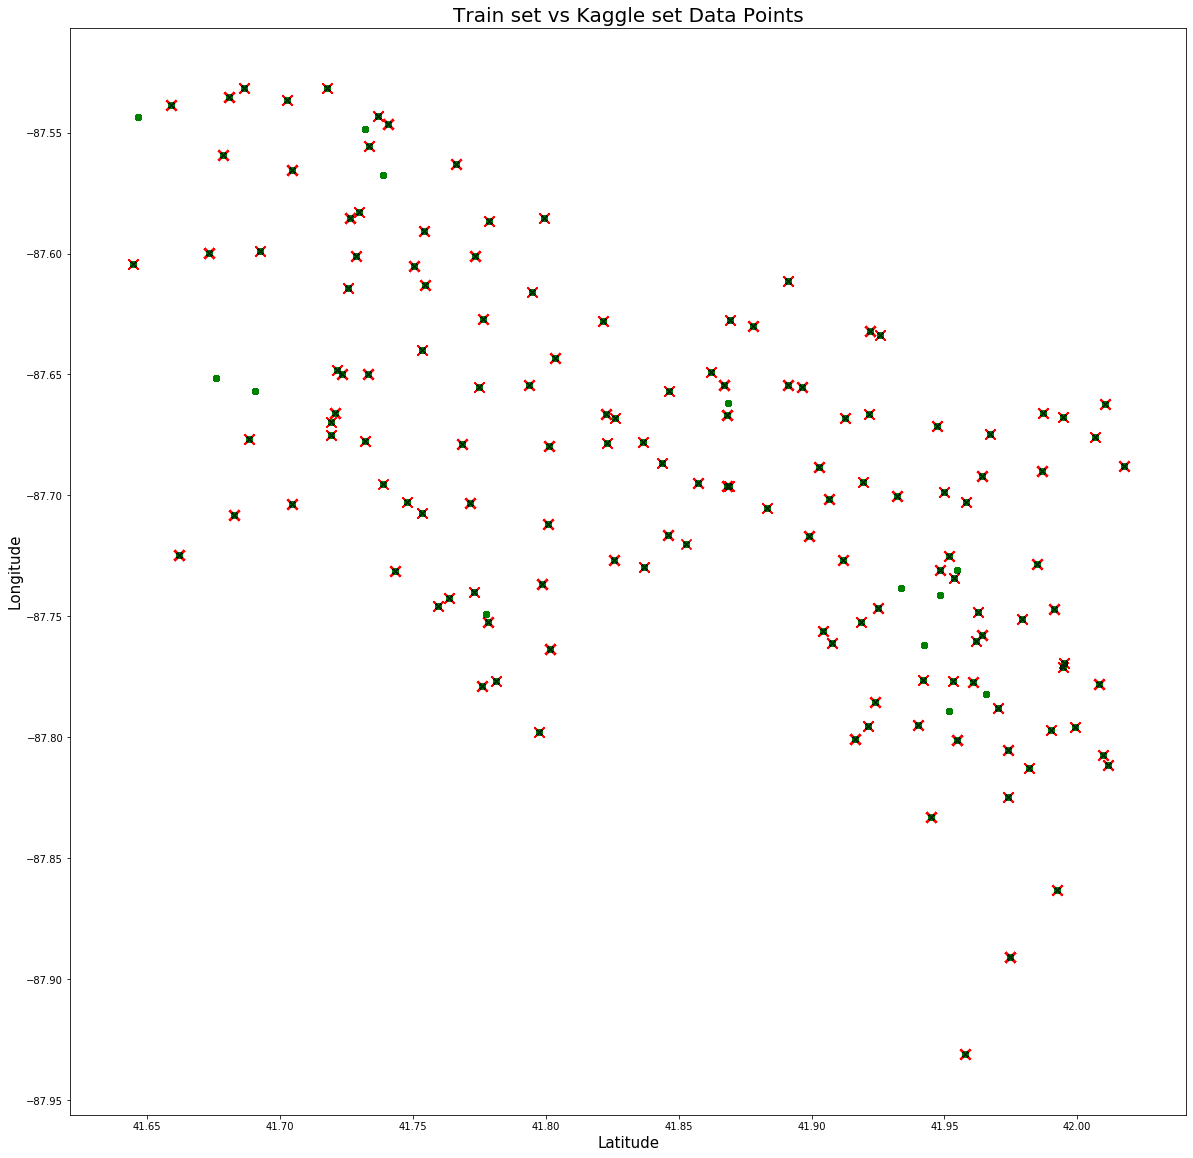

In [38]:
fig = plt.figure(figsize = (20, 20))
ax = plt.scatter(x = 'Latitude', y = 'Longitude', data = model1_train, c = 'r', marker = 'x', alpha = 1, s=100)
plt.scatter(x = 'Latitude', y = 'Longitude', data = model1_kag, c = 'green', marker = 'o', alpha = 0.01)
plt.title('Train set vs Kaggle set Data Points', fontsize = 20)
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Longitude', fontsize = 15)

Red crosses (x) represent traps that appear in the train set.
Blue dots (o) represent traps taht appear in the test (kaggle) set.

There are several traps(lat/long locations) that exist in the kaggle test set, but not in the train set. We will be unable to use trap no. or the specific location as dummies.

### 5.3 Number of Mosquitos by Latitude and Longitude  <a id='num mos lat long'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [41]:
sns.set_style("darkgrid")
def plot_mosquitos(var, year):
    fig = plt.figure(figsize = (20, 15))
    ax = plt.axes(projection='3d', title = 'Latitude and Longitude vs '+var,
                  xlabel = 'Latitude', ylabel = 'Longitude', zlabel = var)

    # Data for three-dimensional scattered points
    zdata = model1_train[model1_train['Year']==year][var]
    xdata = model1_train[model1_train['Year']==year]['Latitude']
    ydata = model1_train[model1_train['Year']==year]['Longitude']
    ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap = 'nipy_spectral')

    
def plot_wrapper(var, year):
    plot_mosquitos(var, year)
    plt.show()

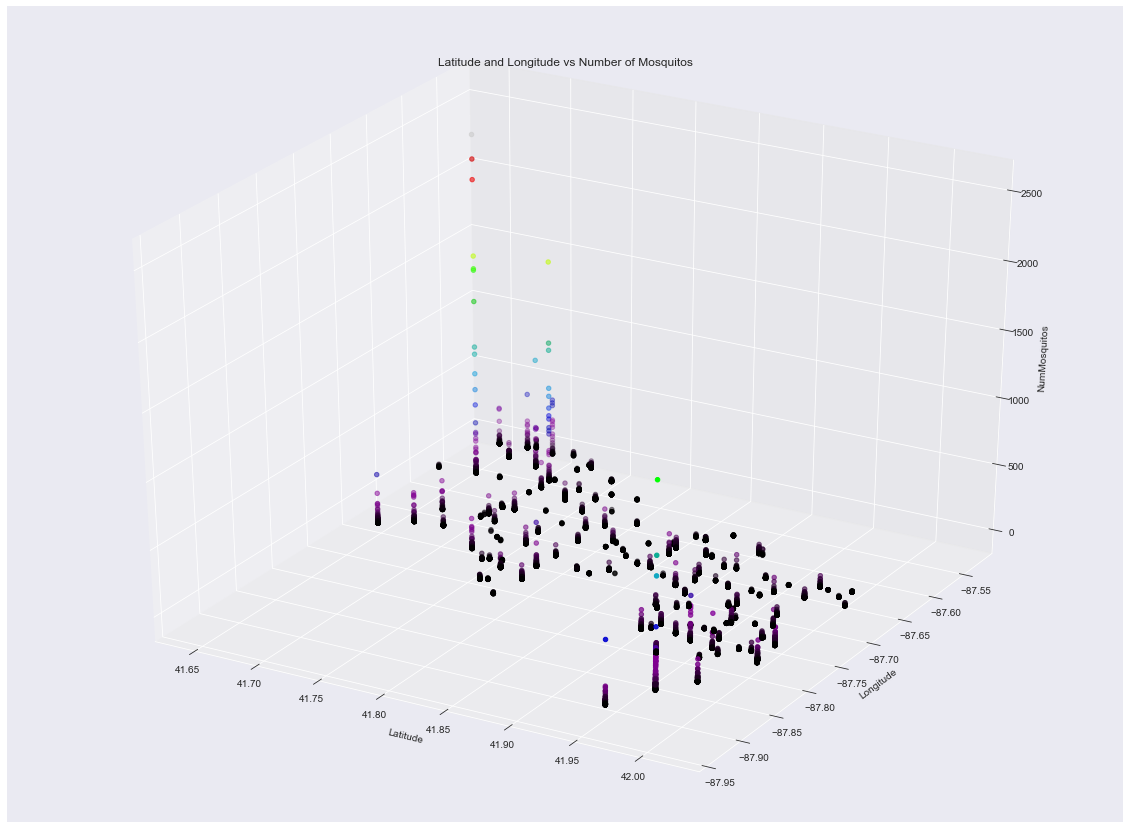

In [42]:
fig = plt.figure(figsize = (20, 15))
ax = plt.axes(projection='3d', title = 'Latitude and Longitude vs Number of Mosquitos',
              xlabel = 'Latitude', ylabel = 'Longitude', zlabel = 'NumMosquitos')

# Data for three-dimensional scattered points
zdata = model1_train['NumMosquitos']
xdata = model1_train['Latitude']
ydata = model1_train['Longitude']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap = 'nipy_spectral')

There appears to be a large mosquito cluster in the northern area. However, because this is aggregated data, we will need to break this down into yearly components.

### 5.4 Number of Mosquitos by Latitude, Longitude, and Year  <a id='num mos lat long year'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [43]:
interact(plot_wrapper, var = 'NumMosquitos', year=IntSlider(min=2007, max=2013, step=2));

interactive(children=(Text(value='NumMosquitos', description='var'), IntSlider(value=2007, description='year',…

The above plot is an interactive widget that captures the number of mosquitos in a specific year. By moving the slider, we can see that the distribution of mosquitos are different across the years. 2007 had a massive outbreak in the Northern part of the plot, and this may be an outlier that throws our data off.

## 6. Analysis of West Nile Virus<a id='WNV anal'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

### 6.1 Presence of Virus Based on Different Species  <a id='species'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

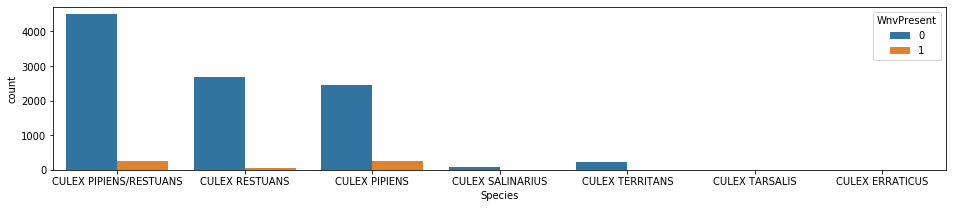

In [18]:
plt.subplots(figsize=(16,3))
ax=sns.countplot('Species',data=train_df,hue='WnvPresent')

- Species CULEX TARSALIS, CULEX ERRATICUS are the species not related to virus
- Species CULEX PIPIENS/RESTUNAS and CULEX PIPIENS have more no. of WnvPresent as 1 i.e. Virus exist. Species CULEX PIPIENS/RESTUNAS being the highest
- Species CULEX RESTUNAS has the lowest no. of WnvPresent as 1 i.e. virus present

### 6.2 Presence of Virus Based on Year  <a id='virus year'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

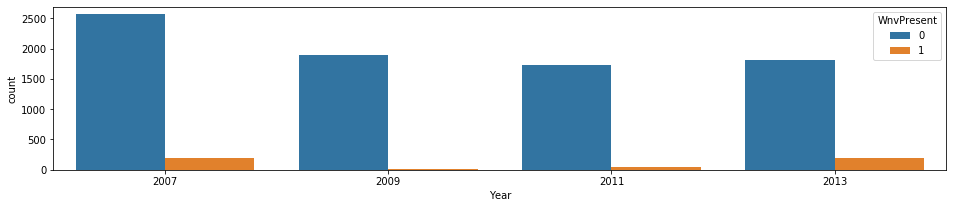

In [22]:
plt.subplots(figsize=(16,3))
ax=sns.countplot('Year',data=model1_train,hue='WnvPresent')

- WnvPresent in the year of 2011 is less
- WnvPresent in the year of 2013 is more with count appx 250
- WnvPresent in the year of 2007 while there is no presence of Wnv in year of 2009

### 6.3 Presence of Virus Based on Month  <a id='virus month'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

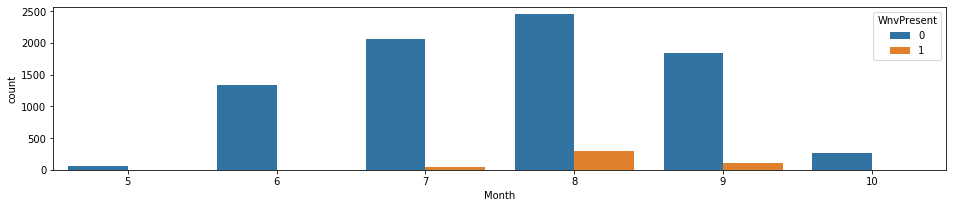

In [23]:
plt.subplots(figsize=(16,3))
ax = sns.countplot('Month',data=model1_train,hue='WnvPresent')

- WnvPresent mainly in month of August followed by September and then July
- There is no virus in the months of May, June, October

#### Combining year and month

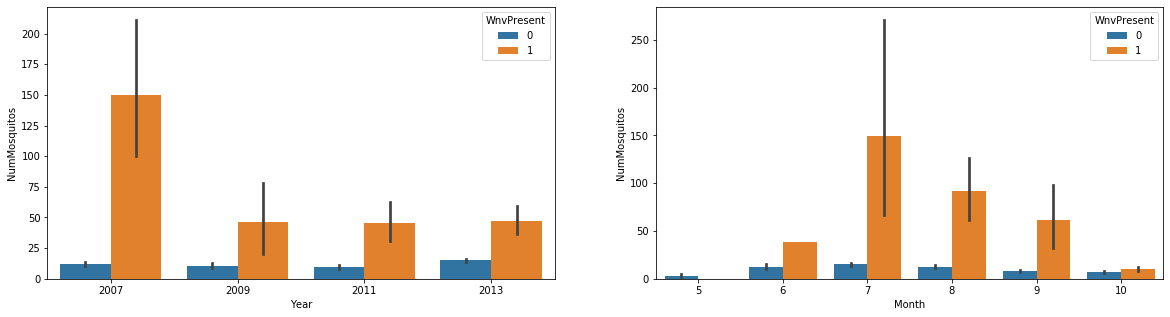

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax=sns.barplot('Year','NumMosquitos',data=model1_train,hue='WnvPresent')
#plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
ax=sns.barplot('Month','NumMosquitos',data=model1_train,hue='WnvPresent')

- Mosquitos are present mostly in the year of 2013 followed by year of 2007
- Year 2009 has less number of mosquitos and 2011 being the year with least number of mosquitos
- Month of July has the highest number of mosquitos followed by month on August and then June
- May month has the least number of mosquitos
- Significant amount of variance in July (represented by the black line). The black line represents error bars that display confidence intervals. This means that the spread of the original non-aggregated data was quite wide.

### 6.4 Presence of Virus Based on Latitude and Longitude  <a id='wnv lat long'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

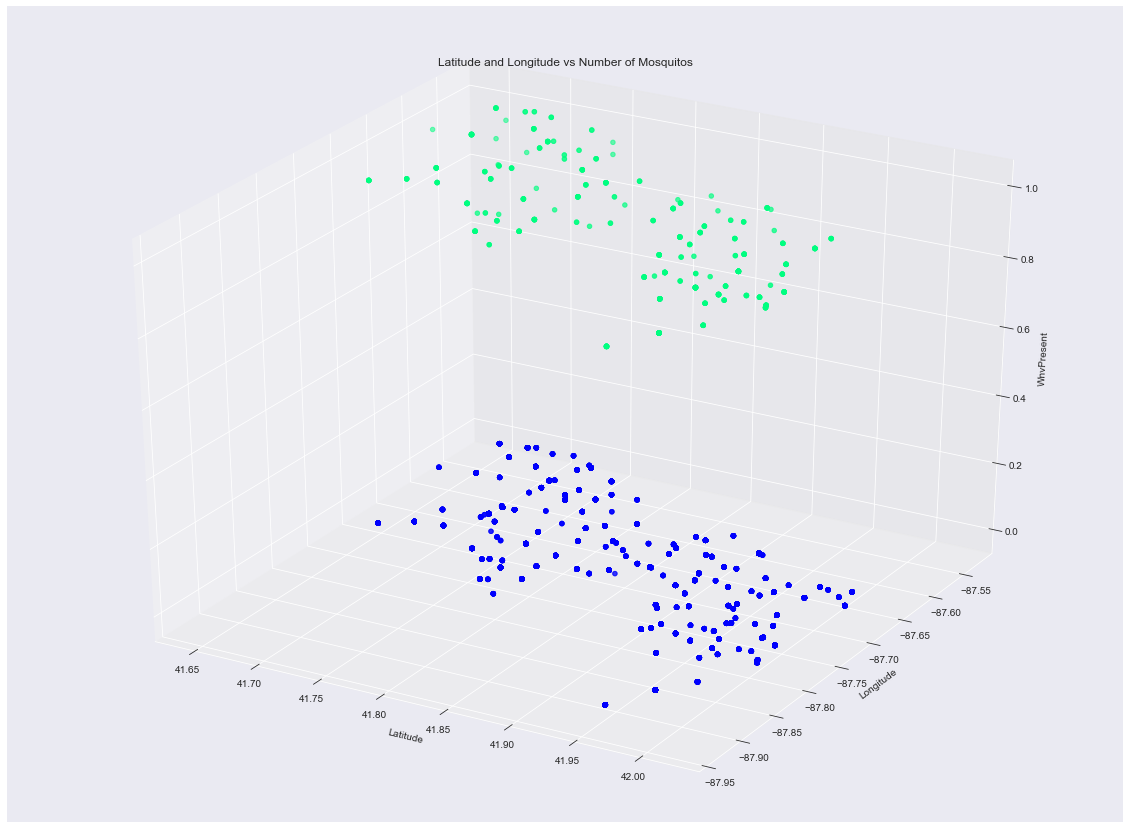

In [44]:
fig = plt.figure(figsize = (20, 15))
ax = plt.axes(projection='3d', title = 'Latitude and Longitude vs Number of Mosquitos',
              xlabel = 'Latitude', ylabel = 'Longitude', zlabel = 'WnvPresent')

# Data for three-dimensional scattered points
zdata = model1_train['WnvPresent']
xdata = model1_train['Latitude']
ydata = model1_train['Longitude']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap = 'winter')

### 6.5 Presence of Virus Based on Latitude and Longitude and Year  <a id='wnv lat long year'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [45]:
interact(plot_wrapper, var = 'WnvPresent', year=IntSlider(min=2007, max=2013, step=2));

interactive(children=(Text(value='WnvPresent', description='var'), IntSlider(value=2007, description='year', m…

For the above two plots, no clear trends for the WNV can be seen, apart from how 2009 and 2011 had lower occurences.
It is interesting to note that in 2009 and 2011, when the appearance of WNV was lower, WNV tended towards the southern areas rather than the north.

## 7. Correlation Analysis  <a id='corr'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [46]:
#Plots seaborn regplot
plt.style.use('seaborn-white')
def subplot_scatter(dataframe, list_of_x, target):
    nrows = int(np.ceil(len(list_of_x)/2)) # Makes sure you have enough rows
    #tweak figsize scaler if graphs don't fit well
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, len(list_of_x)*4), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, x_axis in enumerate(list_of_x): # Gives us an index value to get into all our lists
        corr_val = round(dataframe[x_axis].corr(dataframe[target]), 2) #finds correlation value to print on graph
        sns.regplot(x = dataframe[x_axis], y = dataframe[target], data = dataframe, ax=ax[i])
        ax[i].set_title(list_of_x[i])
        ax[i].set_xlabel(list_of_x[i]) 
        ax[i].set_ylabel(target)
        ax[i].text(0.75, 0.5, "Correlation: {}".format(corr_val), ha="left", va="top", transform=ax[i].transAxes, fontsize=12)

In [65]:
#Generates a one column "heatmap" that highlights the top n correlations for a particular feature.
#Used as a quick feature selection heuristic
def quick_heat(my_df, feature, n=10):
    plt.style.use('ggplot')
    plt.figure(figsize=(15, n*0.6))
    data = pd.DataFrame(my_df.corr()[feature].abs().sort_values(ascending=False)).drop([feature], axis = 0).head(n)
    sns.heatmap(data, cmap="YlGnBu", annot=True).set_title("Correlations to {} (Absolute Value)".format(feature))
    corr_list = data.index
    return list(corr_list)

In [60]:
list_of_x = [i for i in model1_train.columns if (model1_train[i].dtype == 'float64') or (model1_train[i].dtype == 'int64')]

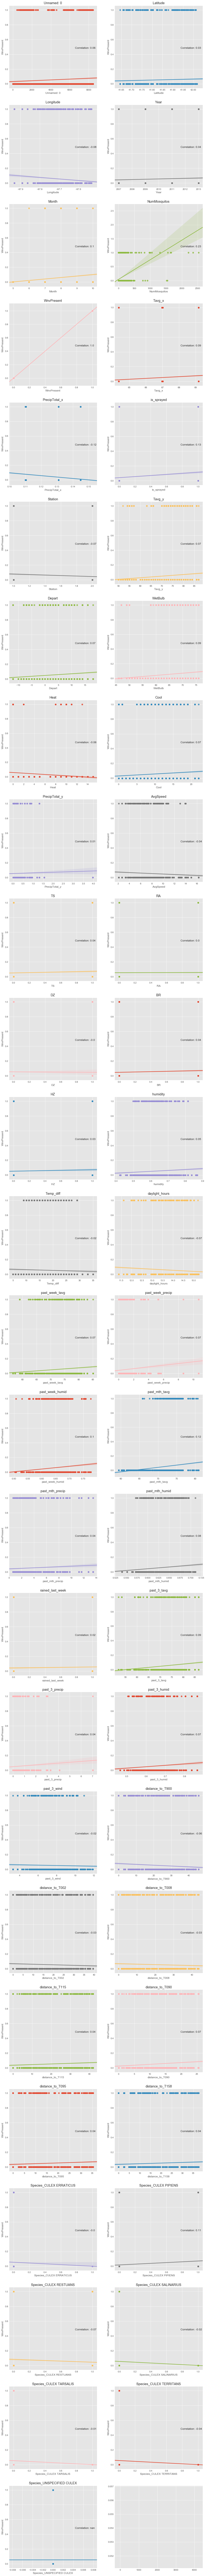

In [61]:
subplot_scatter(model1_train, list_of_x, 'WnvPresent')

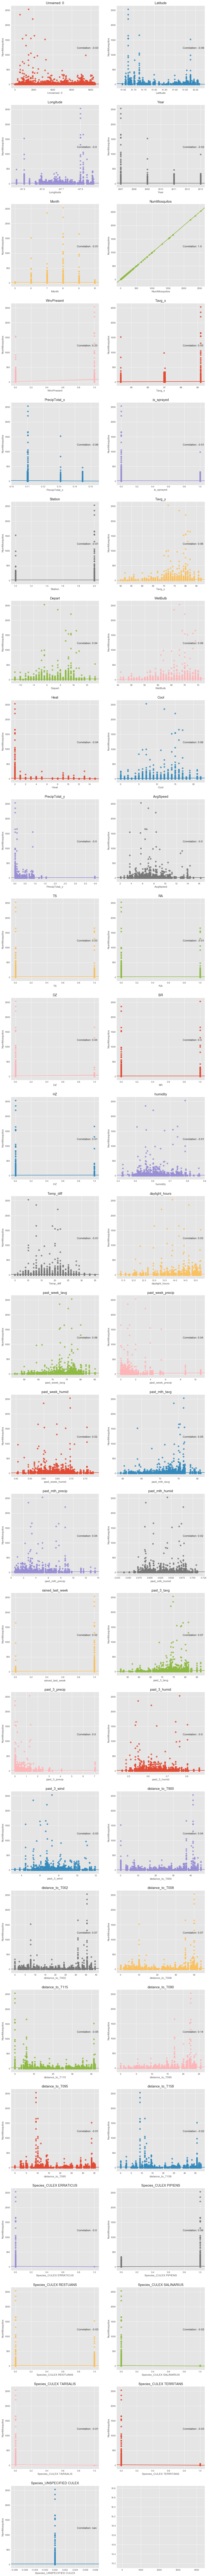

In [63]:
subplot_scatter(model1_train, list_of_x, 'NumMosquitos')

['NumMosquitos',
 'is_sprayed',
 'PrecipTotal_x',
 'past_mth_tavg',
 'Species_CULEX PIPIENS',
 'Month',
 'past_week_humid',
 'WetBulb',
 'Tavg_x',
 'past_3_tavg',
 'past_mth_humid',
 'Longitude',
 'Tavg_y',
 'Species_CULEX RESTUANS',
 'daylight_hours',
 'Cool',
 'past_week_precip',
 'past_week_tavg',
 'past_3_humid',
 'Station']

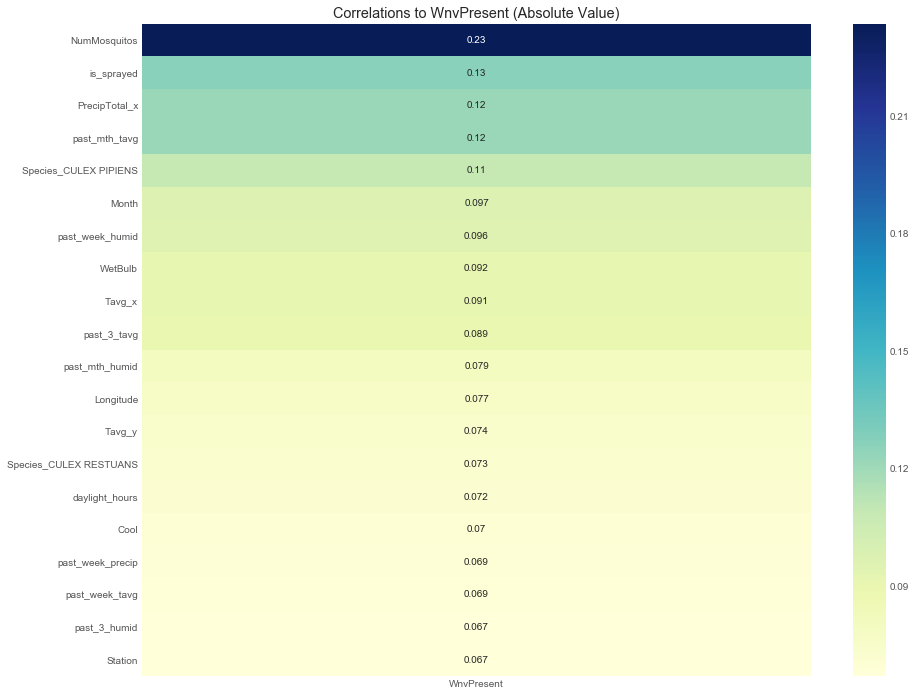

In [67]:
quick_heat(model1_train[list_of_x], 'WnvPresent', n = 20)

['WnvPresent',
 'distance_to_T090',
 'distance_to_T002',
 'distance_to_T008',
 'past_3_tavg',
 'past_week_tavg',
 'Species_CULEX PIPIENS',
 'Cool',
 'Tavg_y',
 'WetBulb',
 'Latitude',
 'PrecipTotal_x',
 'Tavg_x',
 'distance_to_T115',
 'past_mth_tavg',
 'Heat',
 'past_week_precip',
 'Depart',
 'DZ',
 'distance_to_T900']

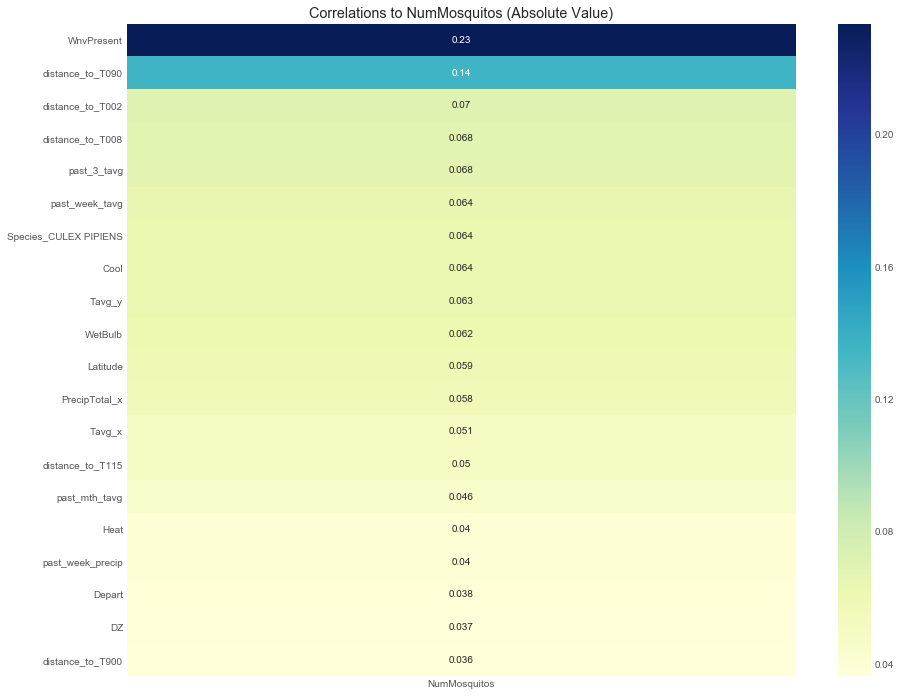

In [68]:
quick_heat(model1_train[list_of_x], 'NumMosquitos', n = 20)

A strange finding is that is_sprayed is correlated with WNV and NumMosquitos.

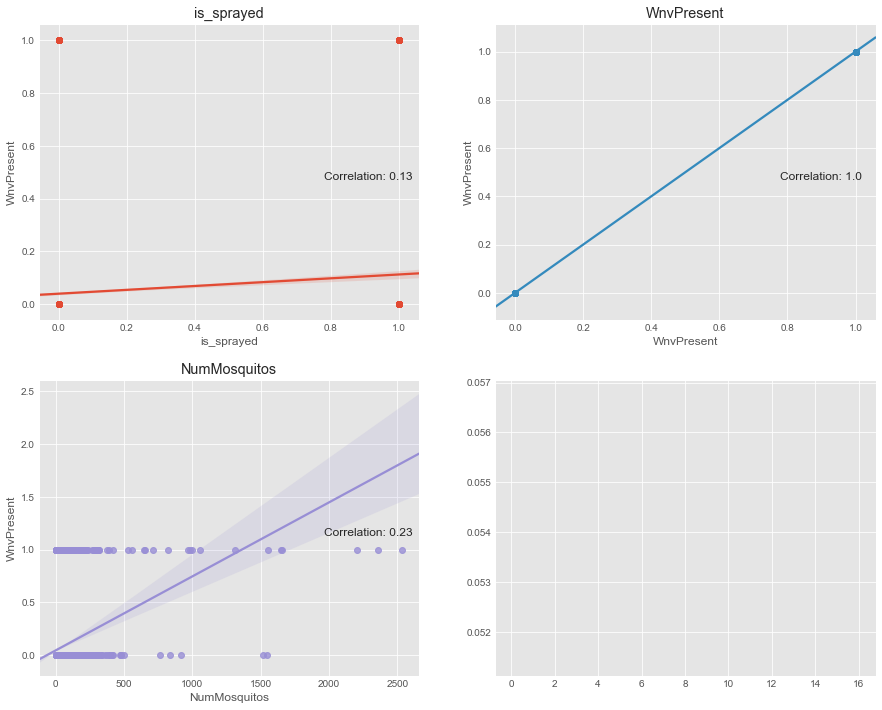

In [73]:
subplot_scatter(model1_train, ['is_sprayed', 'WnvPresent', 'NumMosquitos'], 'WnvPresent')

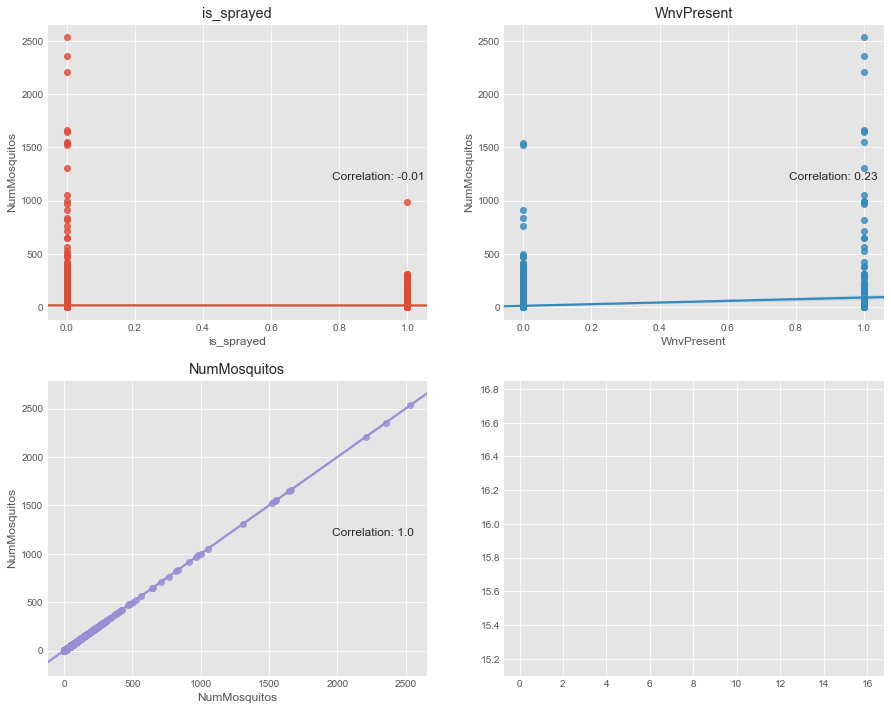

In [74]:
subplot_scatter(model1_train, ['is_sprayed', 'WnvPresent', 'NumMosquitos'], 'NumMosquitos')

This might be spurious correlation or reverse causation - spraying is done in areas with high WNV risk/high number of mosquitos. Without isolating the effect of is_sprayed, we will be unable to adequately use this as a feature in our model. 

MORE ANALYSITS HERE

## 8. Distribution Analysis    <a id='dist'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [95]:
plt.style.use('ggplot')
def subplot_histograms(dataframe, list_of_columns, cols = 2):
    nrows = int(np.ceil(len(list_of_columns)/cols)) # Makes sure you have enough rows
    
    #Scales the height of the fig to accomodate a long list of features    
    fig, ax = plt.subplots(nrows=nrows, ncols=cols, figsize=(25, len(list_of_columns)*(10/cols))) 
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        try:
            sns.distplot(dataframe[column], ax=ax[i],fit=norm, kde=True) 
            mean_val = dataframe[column].mean()

            #runs D’Agostino's normality test to print on graph
            normality_test = stats.normaltest(dataframe[column]).pvalue < 0.05
            ax[i].set_title("Histogram for {}".format(list_of_columns[i]))
            ax[i].set_xlabel(list_of_columns[i]) 
            ax[i].axvline(x = mean_val, label = "mean", color = "darkred").set_linestyle("--")
            ax[i].text(0.75, 0.83, "Normal: {}".format(not normality_test), ha="left", va="top", transform=ax[i].transAxes, fontsize=12)
            ax[i].legend()
        except:
            ax[i].text(0.75, 0.5, "Could not plot {}".format(column), ha="left", va="top", transform=ax[i].transAxes, fontsize=12)

C:\Users\Daniel\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Daniel\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


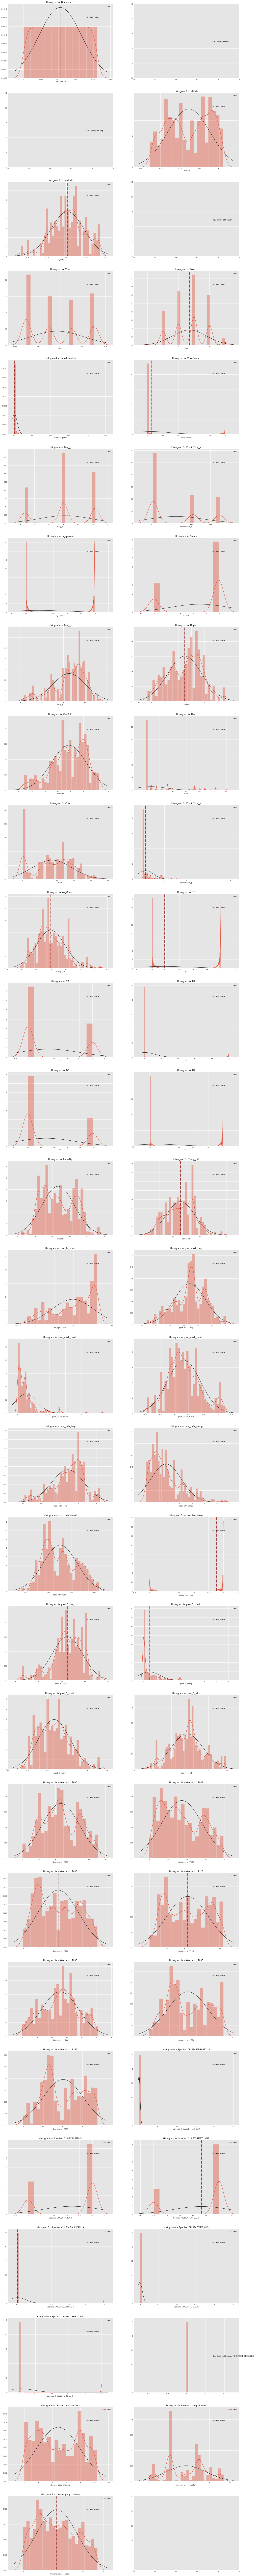

In [97]:
subplot_histograms(model1_train, model1_train.columns, cols = 2)

<u>Help me type analysis here please </u>

## 9. Investigating Clusters   <a id='clusters'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [76]:
#Create a temporary dataframe for EDA by creating synthetic samples, due to imbalanced classes. 
#This will not be used for modelling - smote will be performed on train set later if needed.
df_os = model1_train.drop(['Date', 'Trap', 'Season'], axis = 1)

sme = SMOTEENN()
df_os_x, df_os_y = sme.fit_resample(df_os.drop(['WnvPresent'], axis=1), df_os['WnvPresent'])
df_os = pd.DataFrame(df_os_x, columns = df_os.drop('WnvPresent', axis = 1).columns)
df_os['WnvPresent'] = df_os_y

In [77]:
def geo_cluster_model(model, model_name, dataframe, features = ['Latitude', 'Longitude']):
    model.fit(dataframe[features])
    dataframe[model_name+'_clusters'] = model.labels_
    print('Number of classes: {}'.format(len(set(model.labels_))))
    print('Silhouette Score: {}'.format(silhouette_score(dataframe[features], model.labels_)))
    sns.lmplot(x = 'Latitude', y= 'Longitude', data = dataframe, fit_reg = False, hue = model_name+'_clusters', height = 15)
    return dataframe.groupby([model_name+'_clusters'])[['NumMosquitos', 'WnvPresent']].agg(['mean', 'count'])

### 9.1 DBScan Clusters

Number of classes: 18
Silhouette Score: -0.5934331212724742


NumMosquitos        WnvPresent       
                             mean  count       mean  count
dbscan_geog_clusters                                      
-1                      57.788231     21   1.000000     21
 0                      49.244192  13631   0.528575  13631
 1                       4.414449     84   0.035714     84
 2                       2.545455     22   0.000000     22
 3                       2.458333     24   0.000000     24
 4                       3.241935     62   0.000000     62
 5                       1.847458     59   0.000000     59
 6                       3.600000     70   0.000000     70
 7                       9.315789     19   0.000000     19
 8                       9.798651     21   0.380952     21
 9                      91.754894      5   1.000000      5
 10                     43.626008      7   1.000000      7
 11                     30.284422      8   1.000000      8
 12                     87.717686      4   1.000000      4
 13                     44.985944      3   1.000000      3
 14                     18.160565      5   1.000000      5
 15                     32.441829      5   1.000000      5
 16                     36.311256      3   1.000000      3

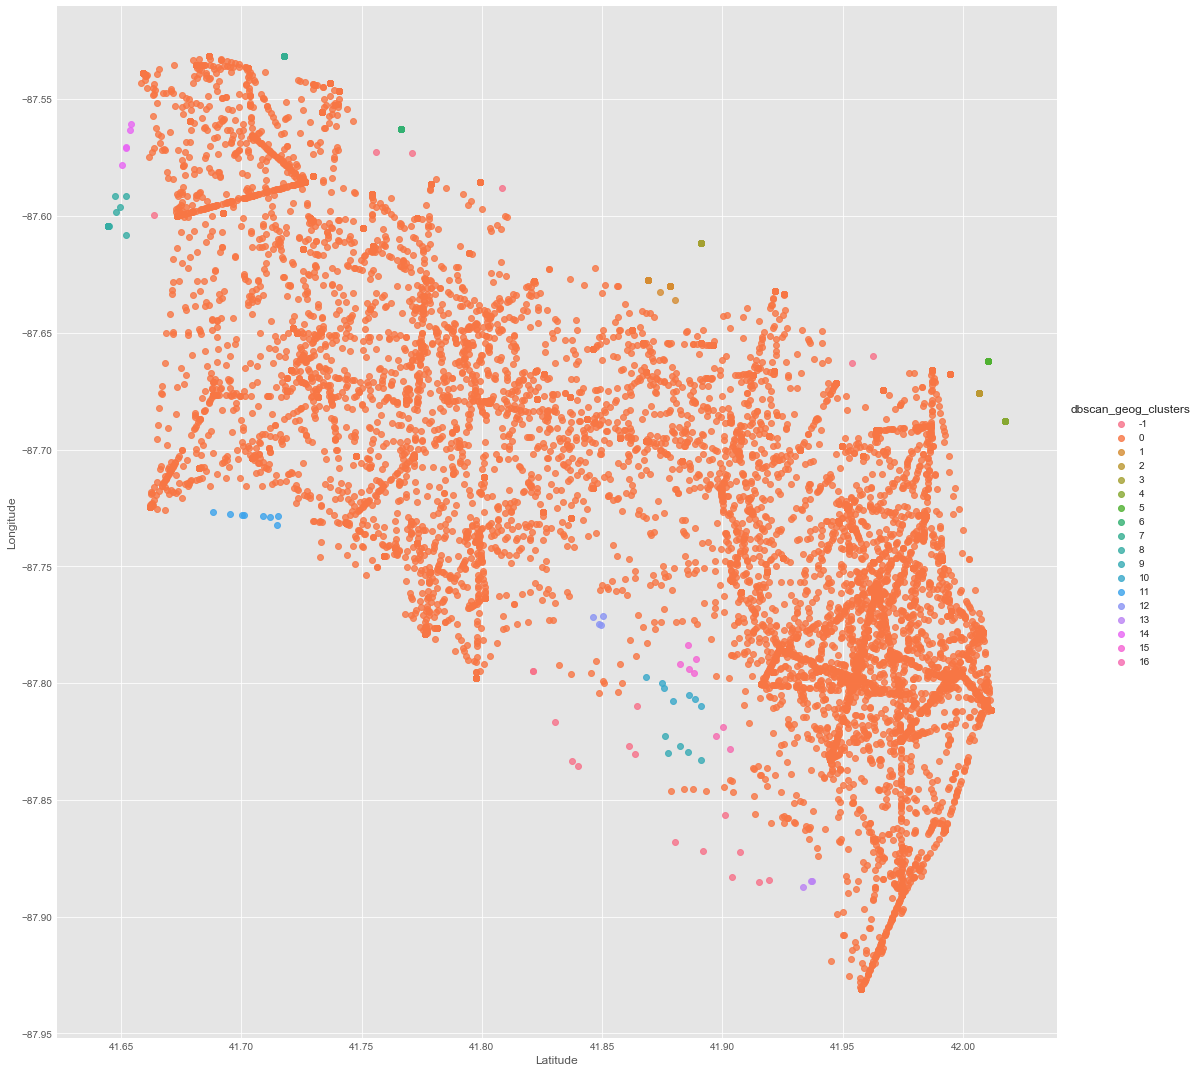

In [84]:
geo_cluster_model(DBSCAN(eps = 0.009, min_samples = 3, n_jobs= -1, algorithm = 'brute'), 'dbscan_geog', df_os,
                 features = ['Latitude', 'Longitude'])

Number of classes: 49
Silhouette Score: 0.46021701457789344


NumMosquitos        WnvPresent       
                             mean  count       mean  count
dbscan_mosq_clusters                                      
-1                     429.693358   1074   0.944134   1074
 0                      12.082919  11900   0.444958  11900
 1                      52.173357    197   0.857868    197
 2                      56.720383     47   0.914894     47
 3                      55.377005     63   0.873016     63
 4                      62.617551     52   0.884615     52
 5                      79.976654     11   0.727273     11
 6                      69.921421     14   0.857143     14
 7                      48.649390    113   0.911504    113
 8                     126.991058     12   0.916667     12
 9                      59.538503     82   0.926829     82
 10                     61.010938     14   0.785714     14
 11                     79.111549     15   0.866667     15
 12                     57.728429     43   0.906977     43
 13                     66.986898     14   0.714286     14
 14                     76.317584     17   0.882353     17
 15                     84.052943     10   0.900000     10
 16                     68.492994     72   0.930556     72
 17                     86.025418     11   0.818182     11
 18                     88.264831     13   0.923077     13
 19                     95.957087      7   0.571429      7
 20                    100.028587      8   0.625000      8
 21                     77.950223      8   0.875000      8
 22                     87.002979      9   0.777778      9
 23                     74.869404     14   0.928571     14
 24                     72.986459     13   0.923077     13
 25                     65.008175     14   0.785714     14
 26                     83.176121     13   1.000000     13
 27                     65.875433     25   1.000000     25
 28                     81.980359      8   1.000000      8
 29                     63.926153     15   0.933333     15
 30                     71.107165     16   1.000000     16
 31                     61.509080     12   1.000000     12
 32                     64.507568     16   1.000000     16
 33                    126.243529      7   1.000000      7
 34                     73.496223     15   1.000000     15
 35                     93.429454      7   1.000000      7
 36                     74.081261      6   1.000000      6
 37                    106.734456      7   1.000000      7
 38                    101.492191      5   1.000000      5
 39                     93.204373      9   0.888889      9
 40                     87.488521      5   1.000000      5
 41                    108.671012      5   1.000000      5
 42                     77.109277      6   0.666667      6
 43                     75.524925      8   1.000000      8
 44                    109.080340      5   1.000000      5
 45                     98.817391      5   1.000000      5
 46                    100.903961      6   0.833333      6
 47                     97.259155      5   1.000000      5

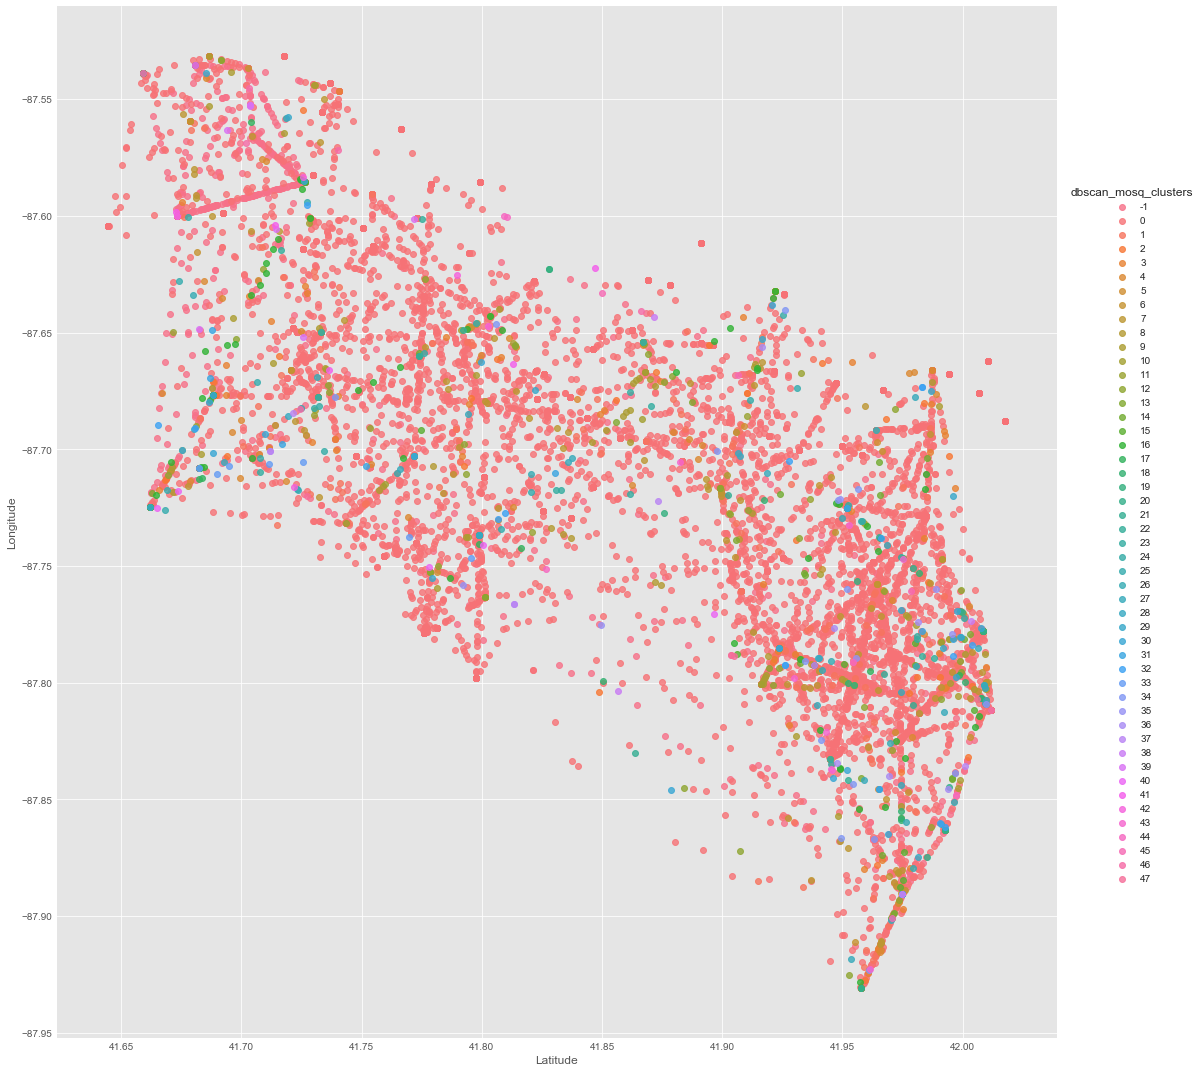

In [79]:
geo_cluster_model(DBSCAN(eps = 0.2, min_samples = 5, n_jobs= -1, algorithm = 'brute'), 'dbscan_mosq', df_os,
                 features = ['Latitude', 'Longitude', 'NumMosquitos'])

Number of classes: 105
Silhouette Score: 0.9442561695903843


NumMosquitos       WnvPresent      
                             mean count       mean count
dbscan_geog_clusters                                    
-1                       6.000000     3   0.000000     3
 0                      11.678788   165   0.030303   165
 1                       5.058824   102   0.009804   102
 2                       4.673797   187   0.005348   187
 3                       7.311828    93   0.053763    93
 4                       8.990000   100   0.070000   100
 5                       8.141026    78   0.064103    78
 6                       9.386207   145   0.027586   145
 7                       6.100000    80   0.037500    80
 8                       4.466667    15   0.000000    15
 9                       8.970149   134   0.044776   134
 10                     31.951220    41   0.170732    41
 11                     13.619048    42   0.119048    42
 12                      4.297872    94   0.021277    94
 13                      4.989796    98   0.040816    98
 14                     21.280992   121   0.041322   121
 15                      3.647059    51   0.000000    51
 16                     21.238095   147   0.054422   147
 17                     11.100719   139   0.035971   139
 18                      8.689189   222   0.040541   222
 19                      3.500000    20   0.050000    20
 20                     12.481481   135   0.051852   135
 21                     10.113208    53   0.075472    53
 22                      2.545455    22   0.000000    22
 23                     10.488000   125   0.088000   125
 24                      7.331034   145   0.055172   145
 25                      3.095745    94   0.010638    94
 26                     25.572414   145   0.103448   145
 27                      6.712766    94   0.042553    94
 28                      3.000000    24   0.000000    24
...                           ...   ...        ...   ...
 74                      4.350649    77   0.012987    77
 75                      5.255556    90   0.044444    90
 76                      6.691919   198   0.020202   198
 77                      4.941176    68   0.029412    68
 78                     10.653465   101   0.039604   101
 79                     22.238710   155   0.038710   155
 80                      5.893204   103   0.019417   103
 81                      7.906040   149   0.020134   149
 82                    151.524476   143   0.104895   143
 83                     66.370861   151   0.072848   151
 84                     13.680000   100   0.010000   100
 85                     27.857143   119   0.058824   119
 86                      2.944444    18   0.000000    18
 87                      2.833333     6   0.000000     6
 88                      3.066667    45   0.000000    45
 89                     10.863636    22   0.000000    22
 90                      8.600000    15   0.066667    15
 91                     93.375000    32   0.125000    32
 92                      7.400000    90   0.077778    90
 93                     18.467391    92   0.076087    92
 94                     21.405797    69   0.072464    69
 95                     99.909091   154   0.188312   154
 96                     24.239583    96   0.093750    96
 97                     23.976190    84   0.130952    84
 98                     16.842857    70   0.057143    70
 99                     17.080000    75   0.120000    75
 100                     5.259259    54   0.018519    54
 101                    11.306667    75   0.053333    75
 102                     3.500000     8   0.000000     8
 103                     9.131148    61   0.114754    61

[105 rows x 4 columns]

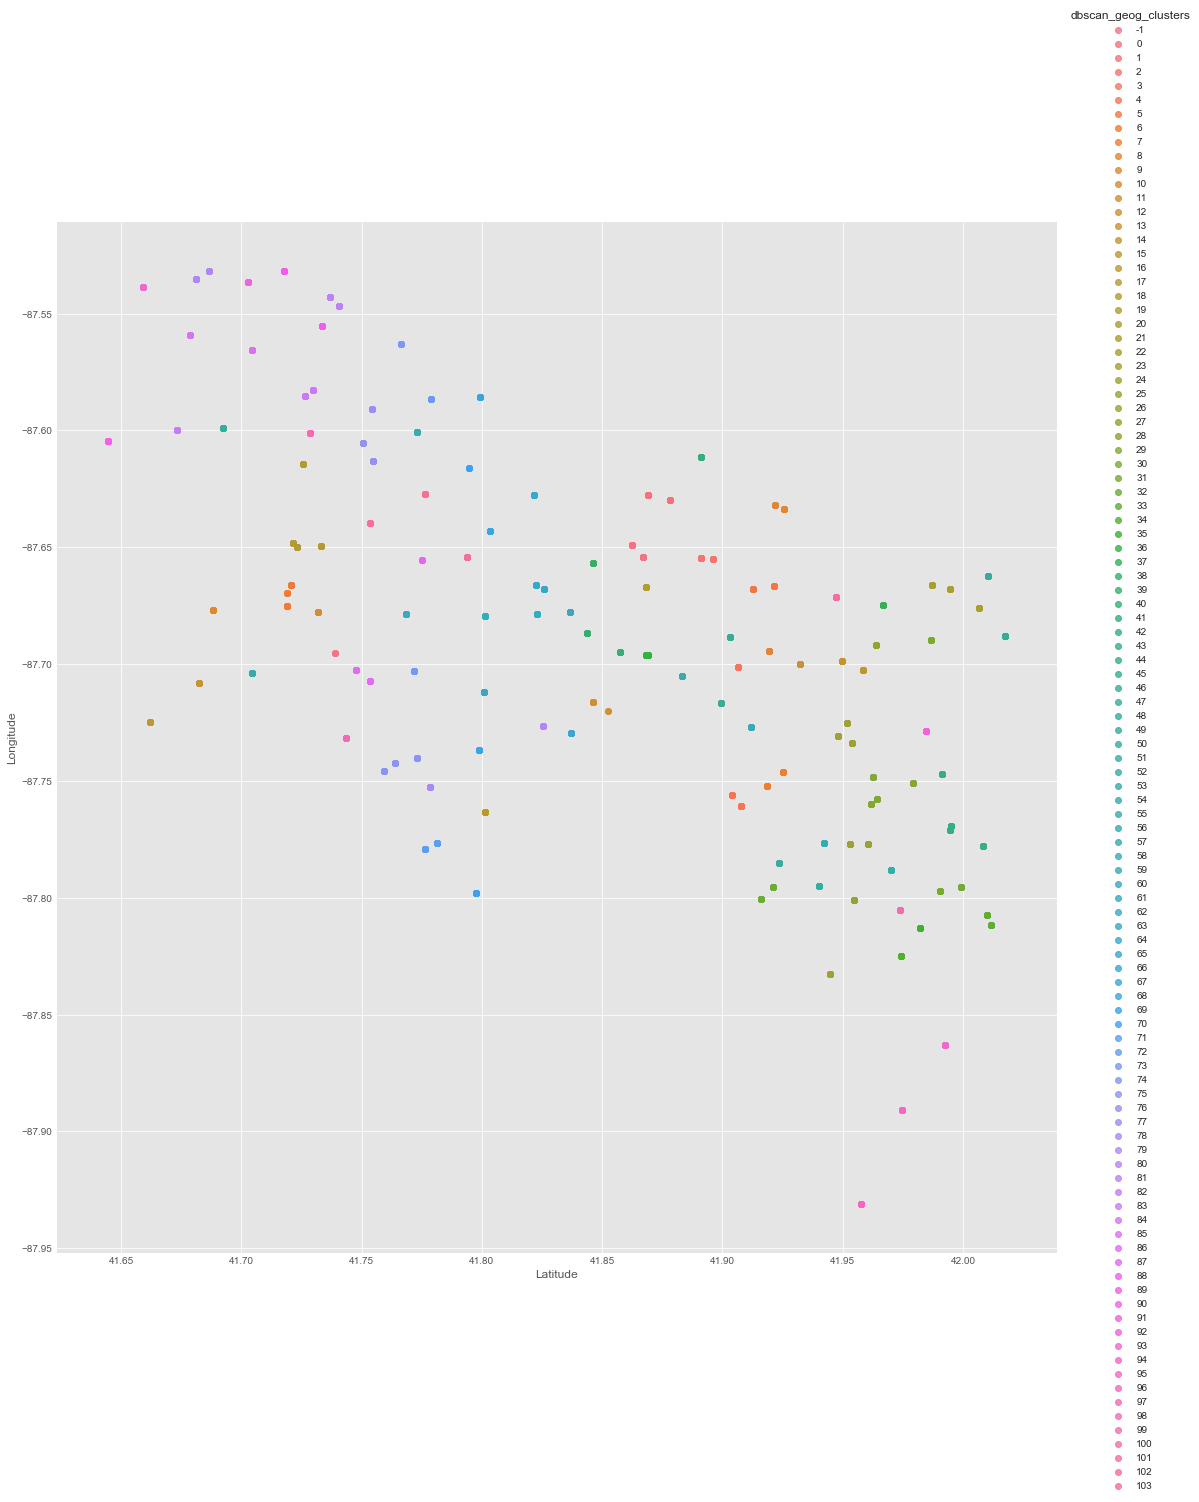

In [80]:
geo_cluster_model(DBSCAN(eps = 0.01, min_samples = 5, n_jobs= -1, algorithm = 'brute'), 'dbscan_geog', model1_train,
                 features = ['Latitude', 'Longitude'])

Number of classes: 105
Silhouette Score: 0.9442561695903843


NumMosquitos       WnvPresent      
                             mean count       mean count
dbscan_geog_clusters                                    
-1                       6.000000     3   0.000000     3
 0                      11.678788   165   0.030303   165
 1                       5.058824   102   0.009804   102
 2                       4.673797   187   0.005348   187
 3                       7.311828    93   0.053763    93
 4                       8.990000   100   0.070000   100
 5                       8.141026    78   0.064103    78
 6                       9.386207   145   0.027586   145
 7                       6.100000    80   0.037500    80
 8                       4.466667    15   0.000000    15
 9                       8.970149   134   0.044776   134
 10                     31.951220    41   0.170732    41
 11                     13.619048    42   0.119048    42
 12                      4.297872    94   0.021277    94
 13                      4.989796    98   0.040816    98
 14                     21.280992   121   0.041322   121
 15                      3.647059    51   0.000000    51
 16                     21.238095   147   0.054422   147
 17                     11.100719   139   0.035971   139
 18                      8.689189   222   0.040541   222
 19                      3.500000    20   0.050000    20
 20                     12.481481   135   0.051852   135
 21                     10.113208    53   0.075472    53
 22                      2.545455    22   0.000000    22
 23                     10.488000   125   0.088000   125
 24                      7.331034   145   0.055172   145
 25                      3.095745    94   0.010638    94
 26                     25.572414   145   0.103448   145
 27                      6.712766    94   0.042553    94
 28                      3.000000    24   0.000000    24
...                           ...   ...        ...   ...
 74                      4.350649    77   0.012987    77
 75                      5.255556    90   0.044444    90
 76                      6.691919   198   0.020202   198
 77                      4.941176    68   0.029412    68
 78                     10.653465   101   0.039604   101
 79                     22.238710   155   0.038710   155
 80                      5.893204   103   0.019417   103
 81                      7.906040   149   0.020134   149
 82                    151.524476   143   0.104895   143
 83                     66.370861   151   0.072848   151
 84                     13.680000   100   0.010000   100
 85                     27.857143   119   0.058824   119
 86                      2.944444    18   0.000000    18
 87                      2.833333     6   0.000000     6
 88                      3.066667    45   0.000000    45
 89                     10.863636    22   0.000000    22
 90                      8.600000    15   0.066667    15
 91                     93.375000    32   0.125000    32
 92                      7.400000    90   0.077778    90
 93                     18.467391    92   0.076087    92
 94                     21.405797    69   0.072464    69
 95                     99.909091   154   0.188312   154
 96                     24.239583    96   0.093750    96
 97                     23.976190    84   0.130952    84
 98                     16.842857    70   0.057143    70
 99                     17.080000    75   0.120000    75
 100                     5.259259    54   0.018519    54
 101                    11.306667    75   0.053333    75
 102                     3.500000     8   0.000000     8
 103                     9.131148    61   0.114754    61

[105 rows x 4 columns]

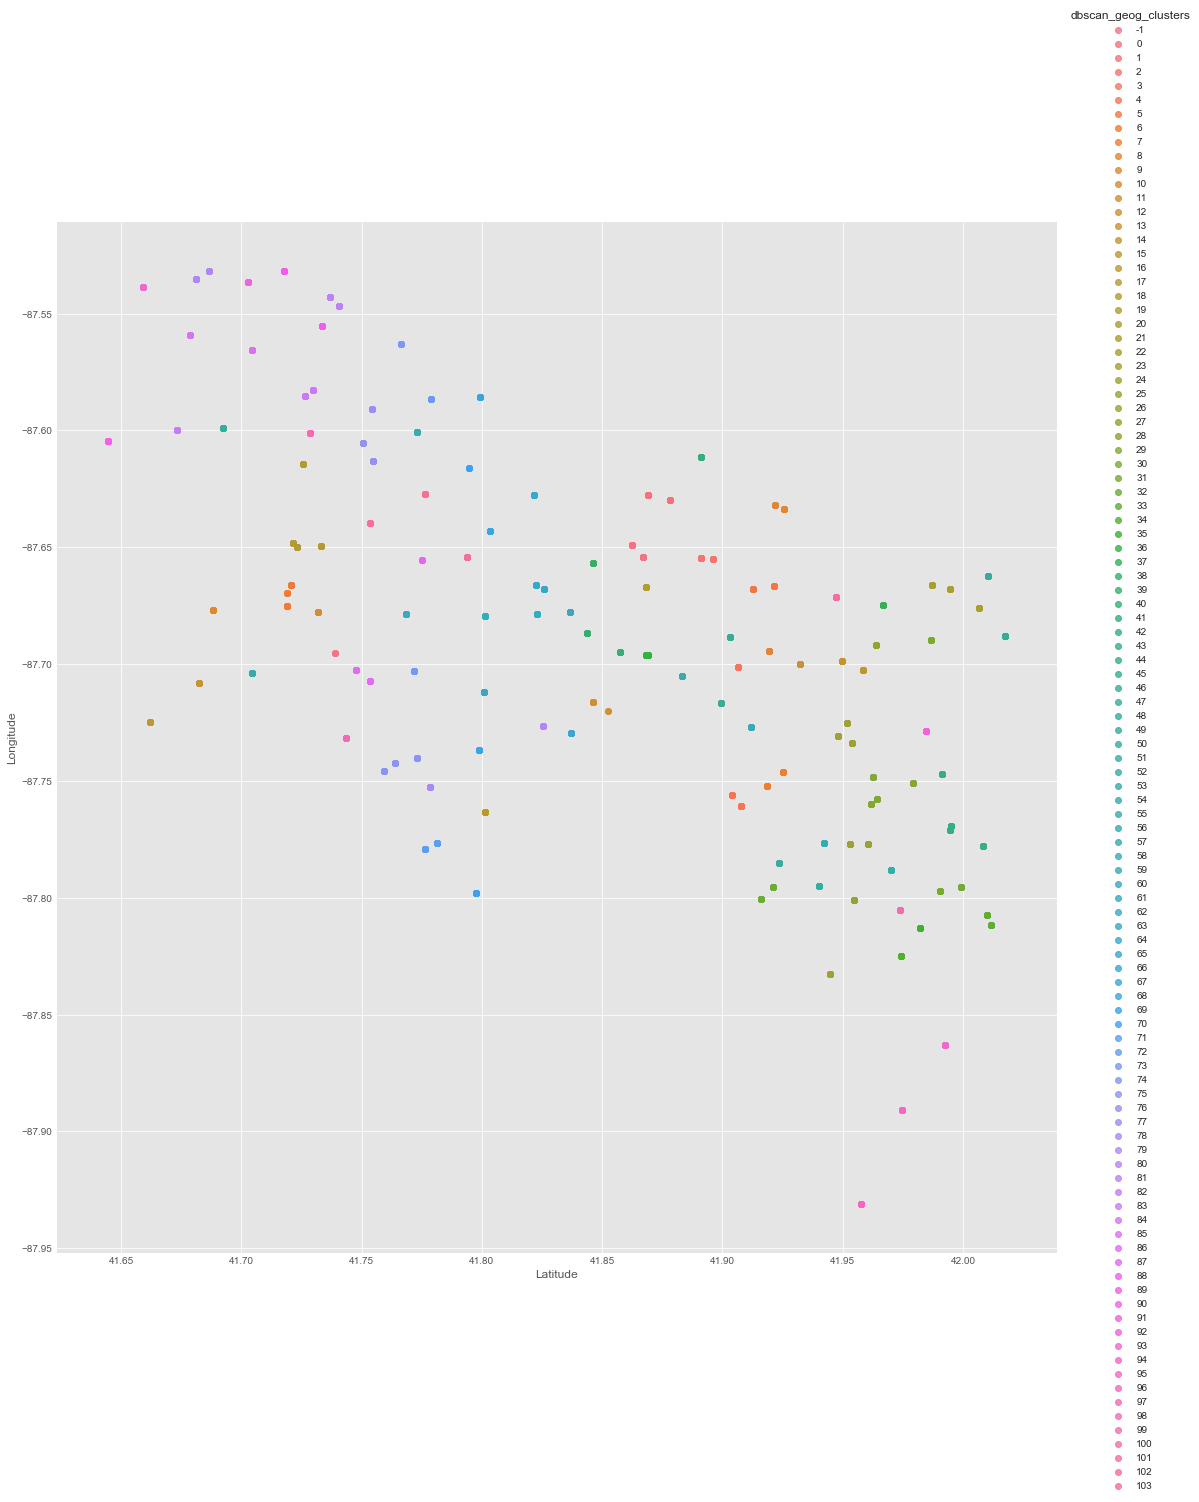

In [81]:
geo_cluster_model(DBSCAN(eps = 0.01, min_samples = 5, n_jobs= -1, algorithm = 'brute'), 'dbscan_geog', model1_train,
                 features = ['Latitude', 'Longitude'])

The DBSCAN on the SMOTEd sample gives us an idea of where the mosquito clusters are (the non-pink areas, class 0 captures areas with an average of 12 mosquitos, the rest capture areas with greater than 50).

### 9.2 KMeans Clusters

In [86]:
len(set(model1_train['Trap']))

136

> We can go up to a maximum of 136 clusters

Number of classes: 75
Silhouette Score: 0.5650862328733486


NumMosquitos       WnvPresent      
                             mean count       mean count
kmeans_geog_clusters                                    
0                      116.040651   360   0.750000   360
1                       15.753026   197   0.654822   197
2                       15.846979   217   0.539171   217
3                       84.790491    66   1.000000    66
4                       33.840493   224   0.687500   224
5                       24.086129    70   1.000000    70
6                        8.766327   239   0.179916   239
7                      119.516402    82   0.548780    82
8                       16.520759   192   0.380208   192
9                       26.729083    86   0.860465    86
10                      40.627403   237   0.654008   237
11                      19.535146   276   0.576087   276
12                      17.198816   219   0.584475   219
13                      15.515933   171   0.374269   171
14                      30.512890   197   0.812183   197
15                      19.480302   134   0.470149   134
16                      35.990833   163   0.411043   163
17                      20.169272   165   0.600000   165
18                     326.328716   253   0.533597   253
19                       8.239225   199   0.160804   199
20                      16.950780   200   0.680000   200
21                      21.642356   288   0.718750   288
22                      17.274209   276   0.565217   276
23                     608.289164   278   0.557554   278
24                      15.120040   301   0.375415   301
25                      31.839614   155   0.548387   155
26                      60.558449   146   0.390411   146
27                      15.977349   147   0.224490   147
28                      12.253576   247   0.295547   247
29                      12.014683   241   0.369295   241
...                           ...   ...        ...   ...
45                      21.965711   212   0.537736   212
46                      28.495774   260   0.630769   260
47                      55.384006   129   0.782946   129
48                      99.118443    25   1.000000    25
49                      16.888391   155   0.522581   155
50                      31.094277   167   0.281437   167
51                      16.720930   130   0.738462   130
52                      42.765265    51   1.000000    51
53                      20.480845   142   0.549296   142
54                      13.687289   134   0.358209   134
55                      11.188083   170   0.447059   170
56                      20.602791    78   0.628205    78
57                       6.944047   114   0.078947   114
58                      27.267831   157   0.636943   157
59                       4.037930    72   0.027778    72
60                      25.602780   445   0.635955   445
61                      10.261285   187   0.342246   187
62                      29.471881   157   0.522293   157
63                      14.661100   211   0.682464   211
64                      86.861120    64   1.000000    64
65                      33.924722   110   0.300000   110
66                      19.547943   234   0.427350   234
67                      23.738544   164   0.554878   164
68                     170.490148   196   0.556122   196
69                      21.498540   183   0.453552   183
70                      21.945352   143   0.825175   143
71                      13.434914   170   0.370588   170
72                      21.422445   267   0.434457   267
73                      15.677178   127   0.503937   127
74                     543.156236   110   0.836364   110

[75 rows x 4 columns]

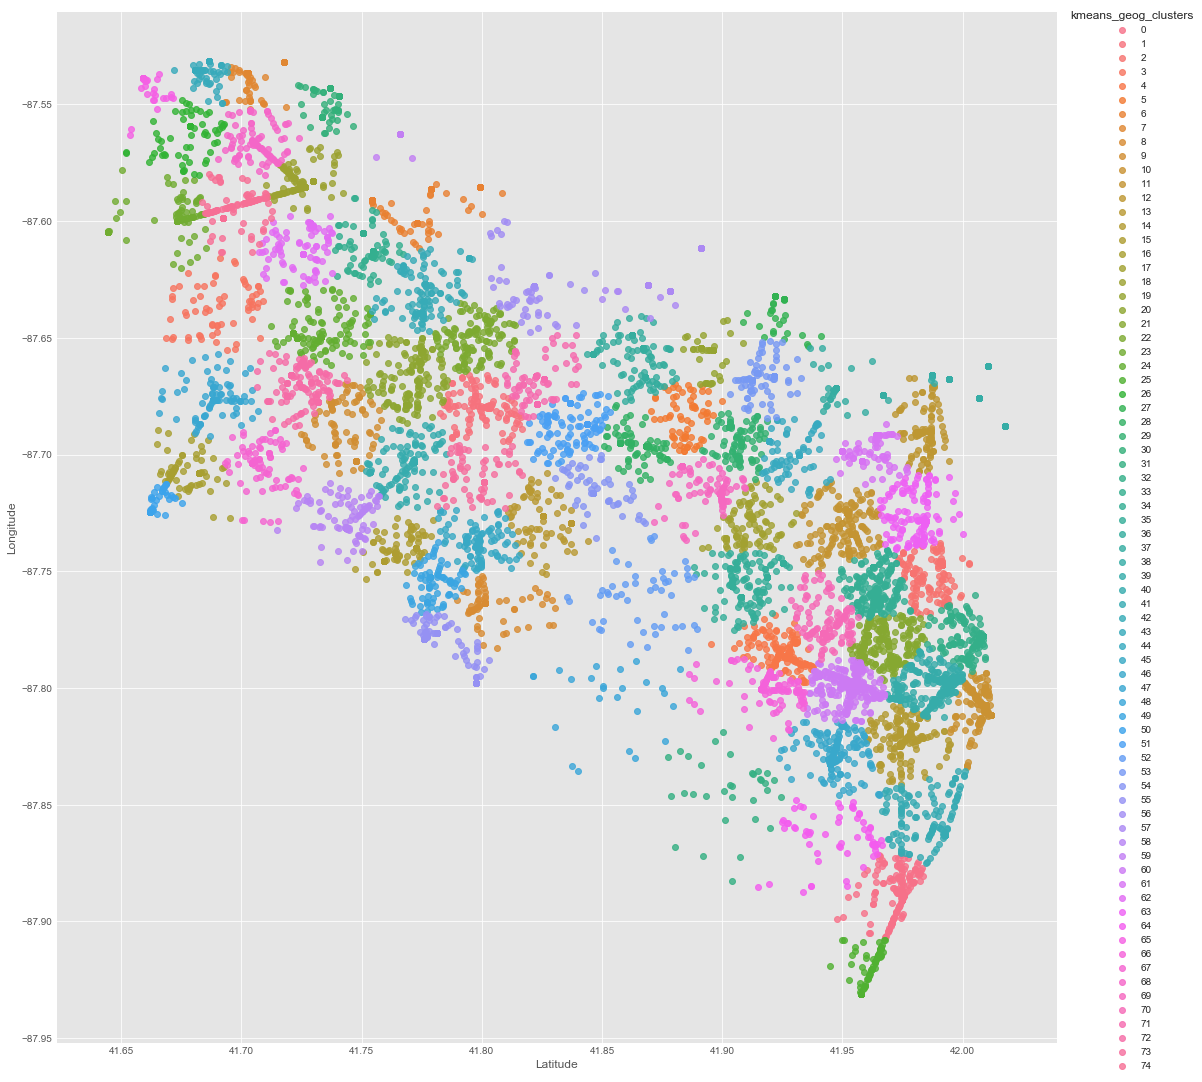

In [87]:
geo_cluster_model(KMeans(n_clusters = 75), 'kmeans_geog', df_os,
                 features = ['Latitude', 'Longitude'])

Number of classes: 75
Silhouette Score: 0.5755666041337903


NumMosquitos       WnvPresent      
                             mean count       mean count
kmeans_mosq_clusters                                    
0                        9.015247  1035   0.568116  1035
1                     1420.891237     5   1.000000     5
2                      520.141822    12   1.000000    12
3                     1962.717240     3   1.000000     3
4                       76.265273   158   0.911392   158
5                      245.989849    36   0.916667    36
6                      954.109617     6   1.000000     6
7                     2348.288999     5   1.000000     5
8                      723.611447     9   1.000000     9
9                     1650.497151    15   1.000000    15
10                      45.194934   376   0.901596   376
11                     141.813022    69   0.884058    69
12                     361.000849    20   0.950000    20
13                      26.258386   682   0.824047   682
14                    1141.406562     5   1.000000     5
15                     845.427097     9   0.888889     9
16                    2113.892510     3   1.000000     3
17                       1.360661  3131   0.034813  3131
18                    1875.610245     2   1.000000     2
19                     307.177117    36   0.944444    36
20                     184.096620    46   0.956522    46
21                     109.327259   107   0.897196   107
22                     459.818589    10   0.900000    10
23                     654.994779    10   1.000000    10
24                    2507.166071     5   1.000000     5
25                    1537.527886     4   1.000000     4
26                      38.405113   559   0.894454   559
27                    1331.195300     5   1.000000     5
28                     221.250214    45   0.933333    45
29                      12.590342  1054   0.667932  1054
...                           ...   ...        ...   ...
45                    2314.643951     8   1.000000     8
46                     793.894355     8   1.000000     8
47                     690.595233     7   1.000000     7
48                    1068.380254     7   1.000000     7
49                    1463.505100     5   1.000000     5
50                      52.177738   303   0.871287   303
51                      32.465898   579   0.873921   579
52                     333.256186    22   0.909091    22
53                    1384.347781     7   1.000000     7
54                     286.769583    47   0.978723    47
55                      86.037676   115   0.930435   115
56                    2067.967466     1   1.000000     1
57                     396.940541    13   1.000000    13
58                    1172.210494     3   1.000000     3
59                      16.493156   883   0.750849   883
60                      67.488869   210   0.928571   210
61                    2405.974891     3   1.000000     3
62                    1693.736747     4   1.000000     4
63                    1917.377798     2   1.000000     2
64                     486.009693     5   0.800000     5
65                     607.797007     5   1.000000     5
66                    2028.147118     2   1.000000     2
67                     200.992070    35   0.942857    35
68                    2198.673184     3   1.000000     3
69                    1822.490591     5   1.000000     5
70                    1500.760587     2   1.000000     2
71                     818.741102    10   1.000000    10
72                    1583.008532     8   1.000000     8
73                       3.442164  1457   0.181881  1457
74                     753.992118    11   1.000000    11

[75 rows x 4 columns]

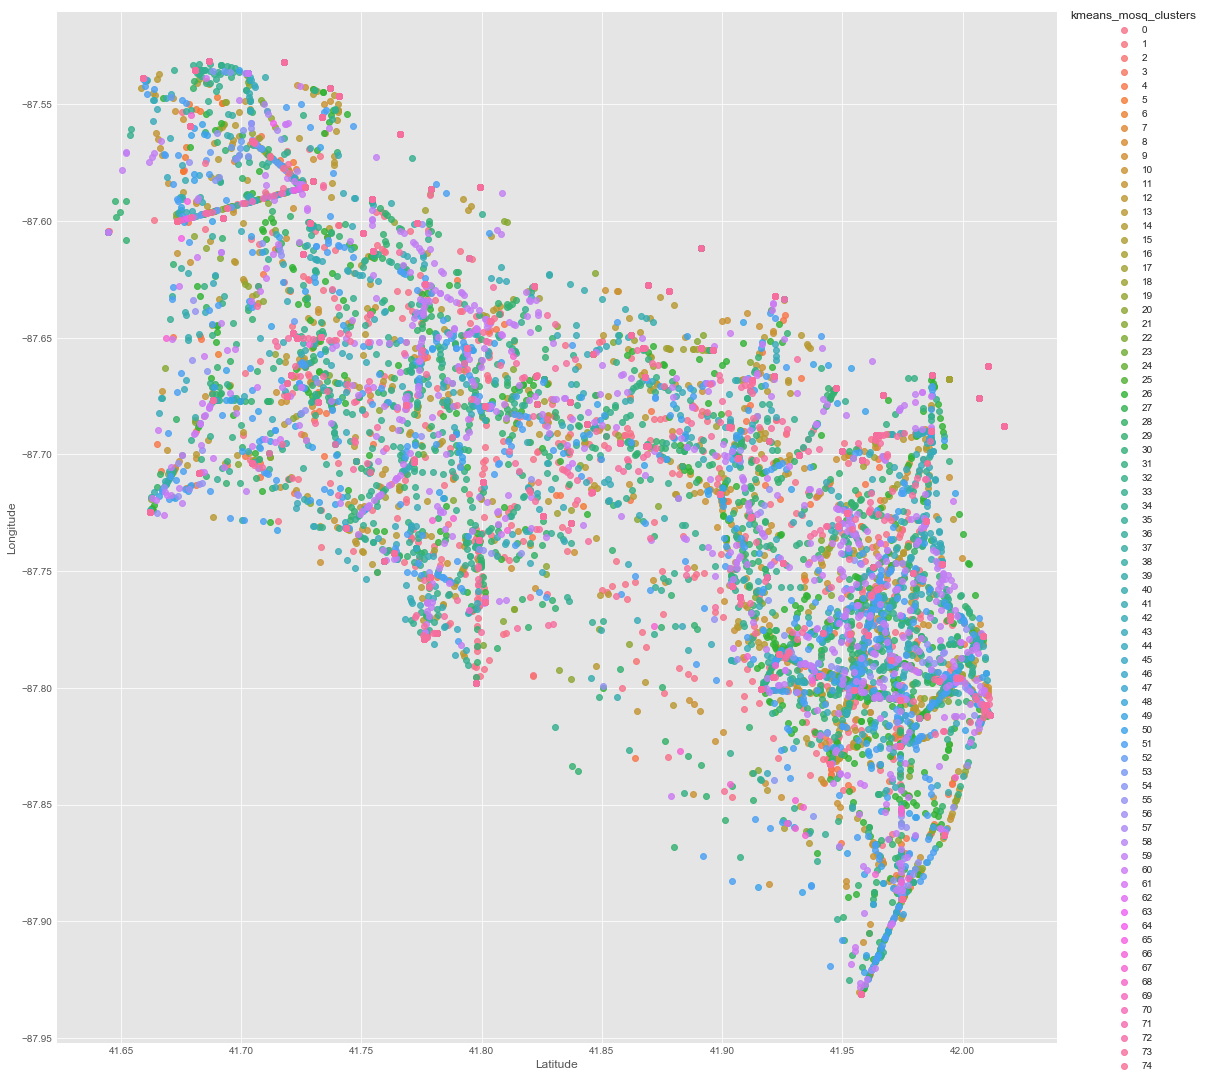

In [88]:
geo_cluster_model(KMeans(n_clusters = 75), 'kmeans_mosq', df_os,
                 features = ['Latitude', 'Longitude', 'NumMosquitos'])

Number of classes: 75
Silhouette Score: 0.8585992807254482


NumMosquitos       WnvPresent      
                             mean count       mean count
kmeans_geog_clusters                                    
0                        6.738636    88   0.056818    88
1                        9.971014    69   0.028986    69
2                       12.481481   135   0.051852   135
3                       13.877778    90   0.055556    90
4                        5.634483   145   0.027586   145
5                       11.100719   139   0.035971   139
6                       99.909091   154   0.188312   154
7                       13.680000   100   0.010000   100
8                       10.545455   165   0.072727   165
9                        3.380952    21   0.000000    21
10                       6.588235    51   0.176471    51
11                      15.065574   122   0.057377   122
12                       6.783505   194   0.015464   194
13                       4.673797   187   0.005348   187
14                       8.462810   121   0.033058   121
15                       8.689189   222   0.040541   222
16                       4.297872    94   0.021277    94
17                       6.244361   266   0.022556   266
18                       9.026549   113   0.079646   113
19                     131.078313   166   0.096386   166
20                      21.238095   147   0.054422   147
21                       6.697531   162   0.018519   162
22                      10.488000   125   0.088000   125
23                       6.100000    80   0.037500    80
24                      17.150794   126   0.071429   126
25                       9.890411   146   0.095890   146
26                      10.653465   101   0.039604   101
27                      22.238710   155   0.038710   155
28                       6.448113   212   0.014151   212
29                      24.239583    96   0.093750    96
...                           ...   ...        ...   ...
45                      18.676647   167   0.059880   167
46                      21.405797    69   0.072464    69
47                       8.316832   101   0.079208   101
48                       4.920354   113   0.035398   113
49                       8.990000   100   0.070000   100
50                       5.493976    83   0.012048    83
51                       5.272000   125   0.024000   125
52                       3.181818    66   0.000000    66
53                       4.453333    75   0.013333    75
54                      18.467391    92   0.076087    92
55                       8.243243    74   0.094595    74
56                      21.280992   121   0.041322   121
57                      10.888889   180   0.027778   180
58                      66.370861   151   0.072848   151
59                      31.951220    41   0.170732    41
60                      15.735294   102   0.107843   102
61                       5.183824   136   0.051471   136
62                       7.886076    79   0.012658    79
63                      10.113208    53   0.075472    53
64                       7.400000    90   0.077778    90
65                       5.048780    41   0.073171    41
66                       2.653846    26   0.000000    26
67                      25.572414   145   0.103448   145
68                      12.173469    98   0.102041    98
69                       7.568182    88   0.045455    88
70                       5.255556    90   0.044444    90
71                       5.050000    80   0.050000    80
72                      59.759259    54   0.074074    54
73                       2.440000    50   0.020000    50
74                       8.600000    15   0.066667    15

[75 rows x 4 columns]

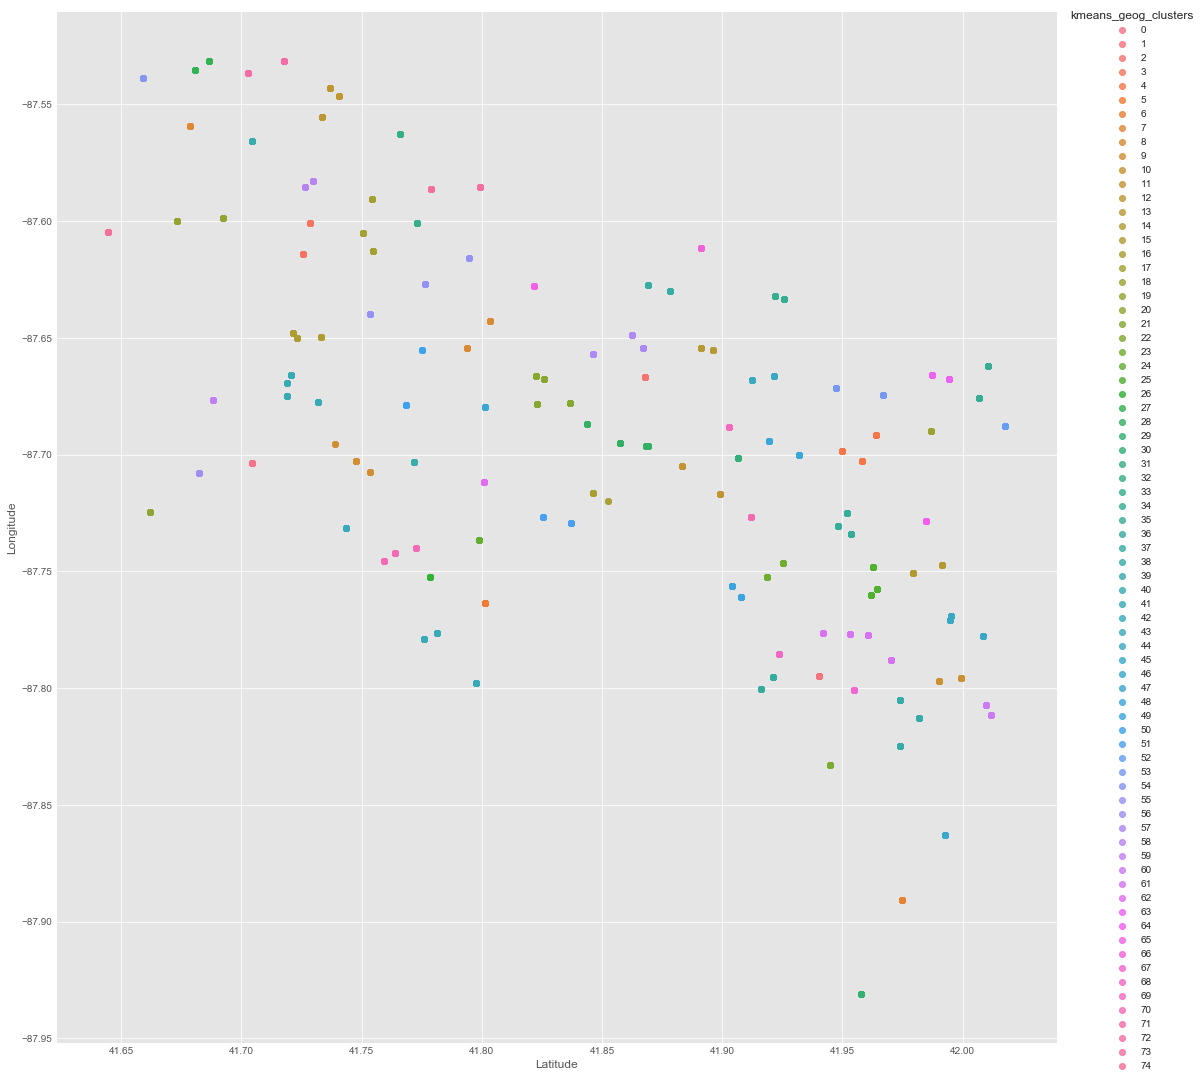

In [91]:
geo_cluster_model(KMeans(n_clusters = 75), 'kmeans_geog', model1_train,
                 features = ['Latitude', 'Longitude'])

Number of classes: 75
Silhouette Score: 0.7482970363698705


NumMosquitos       WnvPresent      
                             mean count       mean count
kmeans_mosq_clusters                                    
0                       17.946860   207   0.091787   207
1                     1548.500000     2   0.500000     2
2                      314.500000     2   1.000000     2
3                      914.000000     1   0.000000     1
4                     2356.000000     1   1.000000     1
5                        4.000000   539   0.022263   539
6                      156.000000     8   0.125000     8
7                       41.839506    81   0.185185    81
8                      647.500000     2   1.000000     2
9                       85.966667    30   0.266667    30
10                    1310.000000     1   1.000000     1
11                     371.333333     3   0.333333     3
12                     467.000000     1   0.000000     1
13                     253.500000     2   0.000000     2
14                    2532.000000     1   1.000000     1
15                     111.100000    10   0.400000    10
16                    1000.000000     1   1.000000     1
17                      59.085714    35   0.228571    35
18                       9.463542   384   0.065104   384
19                    1653.000000     2   1.000000     2
20                     202.250000     4   0.000000     4
21                       1.000000  2096   0.008111  2096
22                      27.847826    92   0.173913    92
23                     765.000000     1   0.000000     1
24                    2207.000000     1   1.000000     1
25                     561.000000     1   1.000000     1
26                     828.500000     2   0.500000     2
27                      77.218750    32   0.218750    32
28                     280.000000     3   1.000000     3
29                     146.000000     8   0.250000     8
...                           ...   ...        ...   ...
45                     968.000000     1   1.000000     1
46                     391.666667     3   0.333333     3
47                     335.333333     3   0.000000     3
48                       2.000000  1167   0.005141  1167
49                     211.833333     6   0.666667     6
50                     232.833333     6   0.333333     6
51                       3.000000   801   0.014981   801
52                    1520.000000     1   0.000000     1
53                      12.965116   344   0.098837   344
54                     304.571429     7   0.285714     7
55                     102.631579    19   0.210526    19
56                     117.666667    12   0.166667    12
57                      20.878788   165   0.121212   165
58                      63.500000    26   0.269231    26
59                     502.000000     1   0.000000     1
60                       5.000000   431   0.039443   431
61                     169.666667     6   0.166667     6
62                     266.400000     5   0.200000     5
63                     479.000000     2   0.000000     2
64                      53.763636    55   0.200000    55
65                      46.339286    56   0.250000    56
66                      37.826667    75   0.253333    75
67                     984.000000     1   1.000000     1
68                     138.000000     9   0.111111     9
69                      31.340206    97   0.154639    97
70                       7.000000   302   0.029801   302
71                     245.800000     5   0.000000     5
72                       8.000000   210   0.047619   210
73                     290.000000     3   0.666667     3
74                     193.000000     5   0.200000     5

[75 rows x 4 columns]

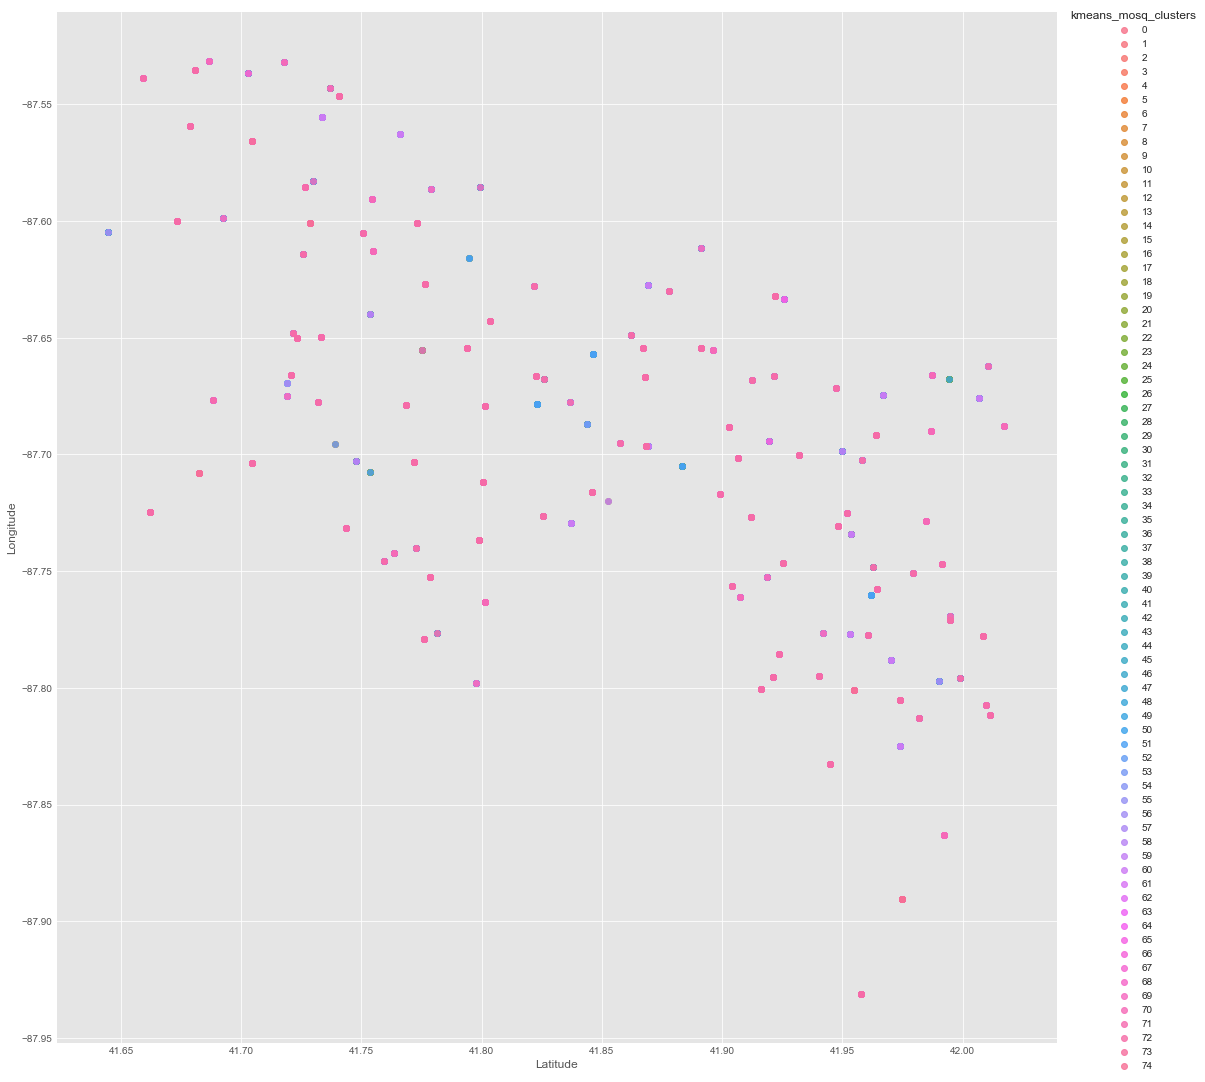

In [90]:
geo_cluster_model(KMeans(n_clusters = 75), 'kmeans_mosq', model1_train,
                 features = ['Latitude', 'Longitude', 'NumMosquitos'])

KMeans does a poor job of clustering mosquitos, but a good job of dividing the region into geographical clusters.

### 9.3 Meanshift Clusters

Number of classes: 28
Silhouette Score: 0.8513958634888431


NumMosquitos        WnvPresent       
                                mean  count       mean  count
meanshift_mosq_clusters                                      
0                          18.687679  13339   0.494340  13339
1                         215.440295    384   0.934896    384
2                         371.531713     66   0.954545     66
3                         807.700004     23   0.956522     23
4                         472.900505     17   0.882353     17
5                        1630.985158     28   1.000000     28
6                         737.541351     18   1.000000     18
7                         551.618466     24   1.000000     24
8                         666.965861     18   1.000000     18
9                        1013.917849     16   1.000000     16
10                        874.896086     13   1.000000     13
11                       2324.687469     12   1.000000     12
12                       1404.423496      7   1.000000      7
13                        944.620502      8   1.000000      8
14                       1453.300302      7   1.000000      7
15                       1345.540758      8   1.000000      8
16                       1148.523184      7   1.000000      7
17                       1082.462722      4   1.000000      4
18                       1809.160801      7   1.000000      7
19                       1709.370442      6   1.000000      6
20                       1545.157703     10   1.000000     10
21                       1220.896996      4   1.000000      4
22                       1916.257712      6   1.000000      6
23                       2190.586182      4   1.000000      4
24                       2124.259994      4   1.000000      4
25                       2395.067911      4   1.000000      4
26                       2507.166071      5   1.000000      5
27                       2025.210810      4   1.000000      4

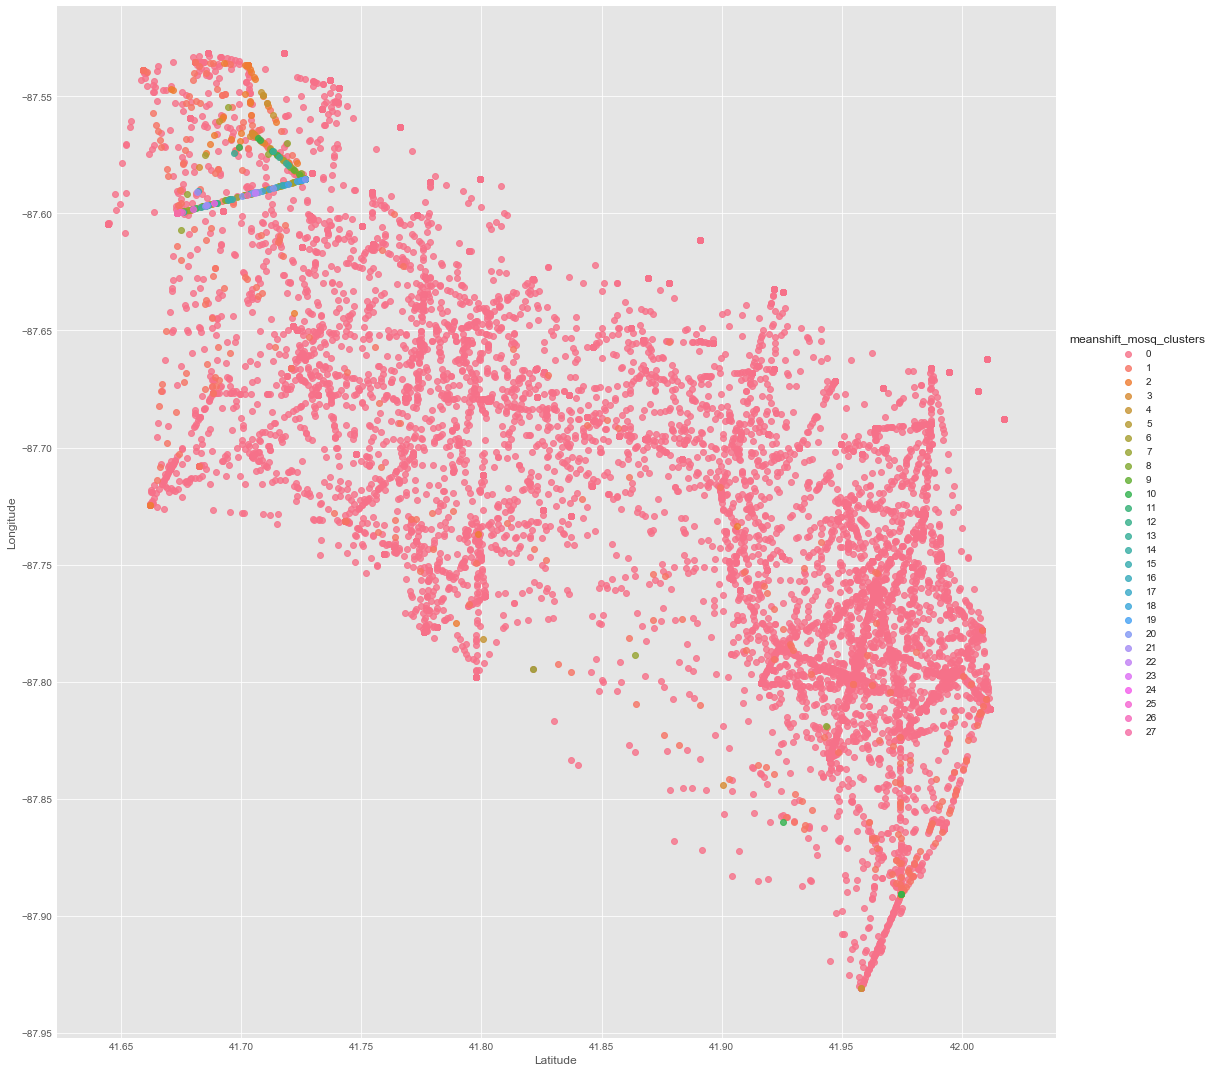

In [93]:
geo_cluster_model(MeanShift(cluster_all = True, n_jobs = -1), 'meanshift_mosq', df_os,
                 features = ['Latitude', 'Longitude', 'NumMosquitos'])

Meanshift does a great job of separating the WNV areas from the noise, as illustrated in the first graph. The pink areas represent areas with low mosquito counts.